## Default of Credit Card Clients Dataset

A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

## Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

(Data source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. We acknowledge the following: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

### Loading Dataset

In [3]:
credit_card=pd.read_csv("C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Capstone\\Capstone Projects\\Credit Card\\default-of-credit-card-clients-dataset\\UCI_Credit_Card.csv")
credit_card.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
409,410,280000.0,1,1,2,31,0,0,0,0,0,0,168382.0,175646.0,180650.0,182672.0,168399.0,167983.0,10000.0,8000.0,6371.0,6217.0,5947.0,6288.0,0
2081,2082,160000.0,2,1,1,33,-1,-1,-1,-1,0,0,7429.0,7165.0,1849.0,4715.0,799.0,0.0,8000.0,2000.0,4755.0,0.0,0.0,0.0,0
8563,8564,20000.0,1,3,1,52,1,2,2,-2,-2,-2,10474.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Nature of the Data

In [4]:
print("Dataset contains",credit_card.shape[0],"samples and" , credit_card.shape[1], "features")

Dataset contains 30000 samples and 25 features


### Dataset Attributes

In [5]:
credit_card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Statistical Overview 

In [6]:
credit_card.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


From the above statistical summary it is evident that

* There are 30000 distinct id's in the dataset which means 30000 credit card holders.

* The average credit limit amount is 167,484.32 with std. 129,747.66 where the highest amount is 1000000.

* Most of the card holders are either graduate school or university.

* Most of the credit card holders are either married or single

* Credit card holders age ranges from 21 to 79 and the average age is 35.48 with standard deviation 9.21

* If we look at our target column which includes two distinct values 0 and 1 where 0 for default payment means "not default" and 1 means "default", and the mean is 0.221 which means that there are 22.1% card holders who will default next month.


### Concise summary of the dataframe

In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

### Outcome Variable Overview

In [8]:
credit_card["default.payment.next.month"].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

### Data Preprocessing

Data preprocessing is done to enhance the quality of data to promote extraction of meaningful insights from the data.
In simple words, cleaning and organizing the raw data to make it suitable for building and training machine learning models.
Data preprocessing in machine learning is a data mining technique that transforms raw data into an understandable and readable format. 

#### Below are some of the preprocessing steps followed

1.Value in EDUCATION not define completely. Since 0, 4, 5, 6 all being define as other (or unknown), will be better to group them together and name it 4.

2.The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

3.Column name 'default.payment.next.month' is better to name it 'DEFAULT'. Shorter and without dot that could probably cause error in code.

4.Column name 'PAY_0' would be better to name it 'PAY_1', to make it consistent with 'BILL_AMT1' and 'PAY_AMT1'.

We might wonder what these labels might mean?

- "Other" in education can be an education lower than the high school level.
- "Other" in marriage could be, for example, "divorced".

In [9]:
import warnings 
warnings.filterwarnings('ignore')

### Grouping unknown values in education

In [10]:
credit_card['EDUCATION'][(credit_card['EDUCATION']==5) | (credit_card['EDUCATION']==6) | (credit_card['EDUCATION']==0)] = 4
credit_card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Grouping unknown values in marriage

In [11]:
credit_card['MARRIAGE'][credit_card['MARRIAGE'] == 0] = 3
credit_card.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Renaming attributes

In [12]:
credit_card = credit_card.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
credit_card.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


## Exploratory Data Analysis (EDA)

### Outcome variable proportion

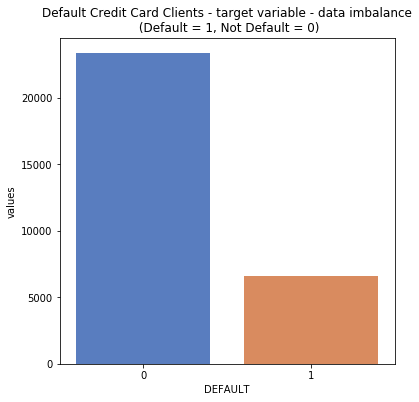

In [14]:
temp = credit_card["DEFAULT"].value_counts()
df = pd.DataFrame({'DEFAULT': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target variable - data imbalance\n (Default = 1, Not Default = 0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'DEFAULT', y="values", data=df,palette="muted")
locs, labels = plt.xticks()
plt.show()

In [ ]:
data.SEX = data.SEX.map({1 : "Male", 2 : "Female"})

data.EDUCATION = data.EDUCATION.map({1 : "graduate school", 2 : "university", 3 : "high school", 4 :"others"})

data.MARRIAGE = data.MARRIAGE.map({1 : "married", 2 : "single", 3 : "others"})

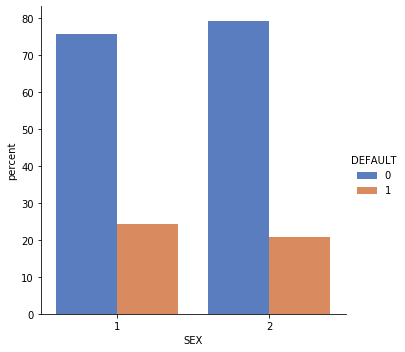

In [21]:
x,y = 'SEX', 'DEFAULT'

(credit_card
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='muted'))

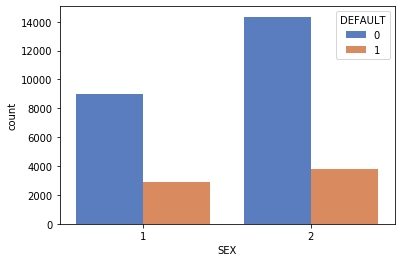

In [19]:
sns.countplot(x='SEX',data=credit_card,hue='DEFAULT',palette="muted")

Number of female credit card holder's are greater than male and females have overall less default payments compared to male.

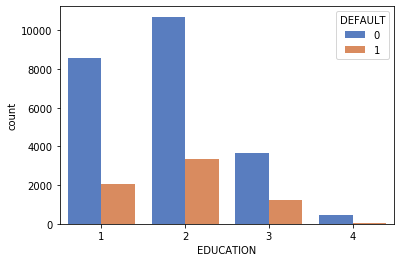

In [16]:
sns.countplot(x='EDUCATION',data=credit_card,hue='DEFAULT',palette="muted")

In [17]:
credit_card['EDUCATION'].value_counts(normalize=True)*100

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: EDUCATION, dtype: float64

More than 70% of the credit card holders education is from university or graduate school. 

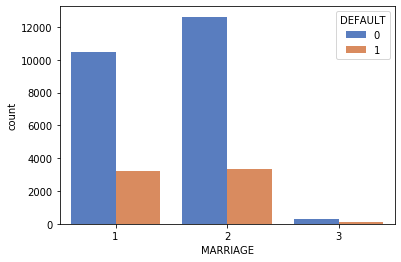

In [18]:
sns.countplot(x='MARRIAGE',data=credit_card,hue='DEFAULT',palette="muted")

In [19]:
credit_card['MARRIAGE'].value_counts(normalize=True)*100

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64

Single people have less default payment compared to married. And greater percentage of married people end up defaulting.

### Five Number Summariers

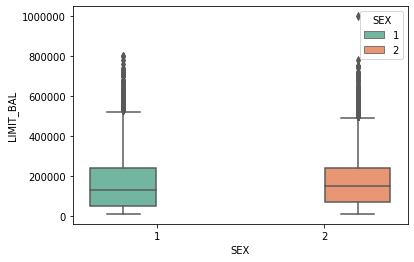

In [20]:
sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data=credit_card,palette='Set2')

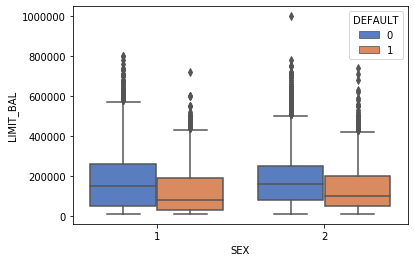

In [21]:
sns.boxplot(x='SEX',hue='DEFAULT', y='LIMIT_BAL',data=credit_card,palette="muted")

Female have higher median limit balance compared to male and also have the highest limit balance for outlier.

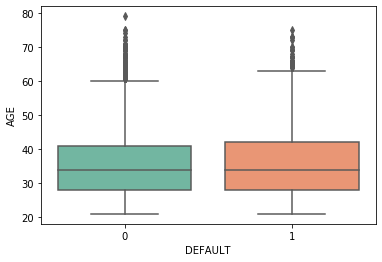

In [22]:
sns.boxplot(x='DEFAULT',y='AGE',data=credit_card,palette='Set2')

It is seen that median age of both defaulters and non-defaulters is 35.

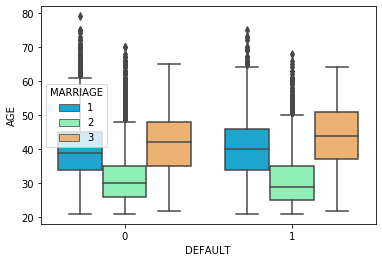

In [23]:
sns.boxplot(x='DEFAULT',hue='MARRIAGE', y='AGE',data=credit_card,palette="rainbow")

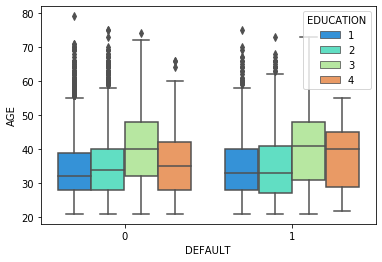

In [24]:
sns.boxplot(x='DEFAULT',hue='EDUCATION', y='AGE',data=credit_card,palette="rainbow" )

### Data Distribution

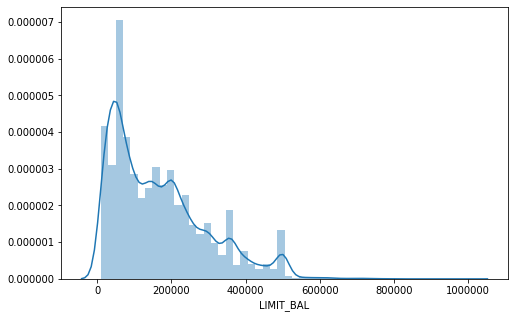

In [25]:
plt.figure(figsize=(8,5))
sns.distplot(credit_card['LIMIT_BAL'],kde=True)

As expected limit balance is right skewed,.

In [26]:
credit_card['LIMIT_BAL'].value_counts().head()

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

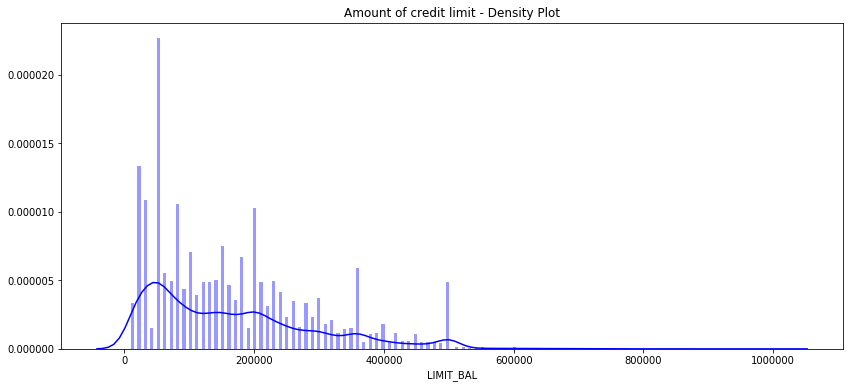

In [27]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit_card['LIMIT_BAL'],kde=True,bins=200, color="blue")

The Spikes in the above plot beautifully visualizes that the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

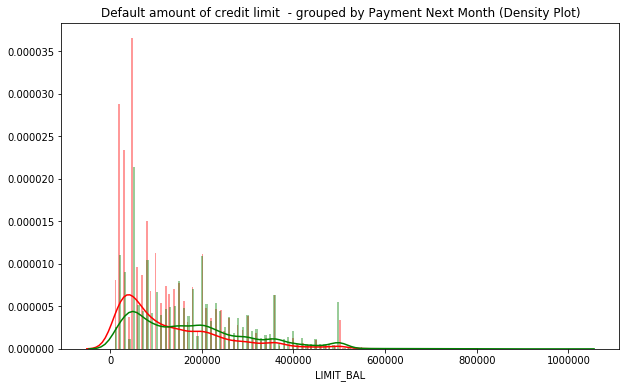

In [28]:
class_0 = credit_card.loc[credit_card['DEFAULT'] == 0]["LIMIT_BAL"]
class_1 = credit_card.loc[credit_card['DEFAULT'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (10,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")

Most of defaults are for credit limits 0-100,000 and density for this interval is larger for defaults than for non-defaults. Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

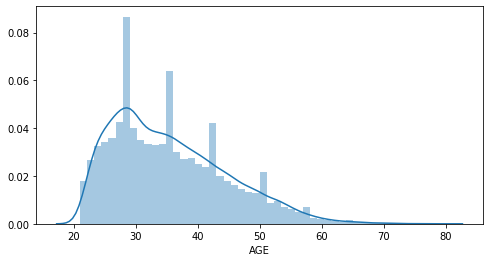

In [29]:
plt.figure(figsize=(8,4))
sns.distplot(credit_card['AGE'],kde=True)

Age is right skewed and it is observed that more than 75% of the credit card holders are from 25 to 50 years of age.

### Correlation

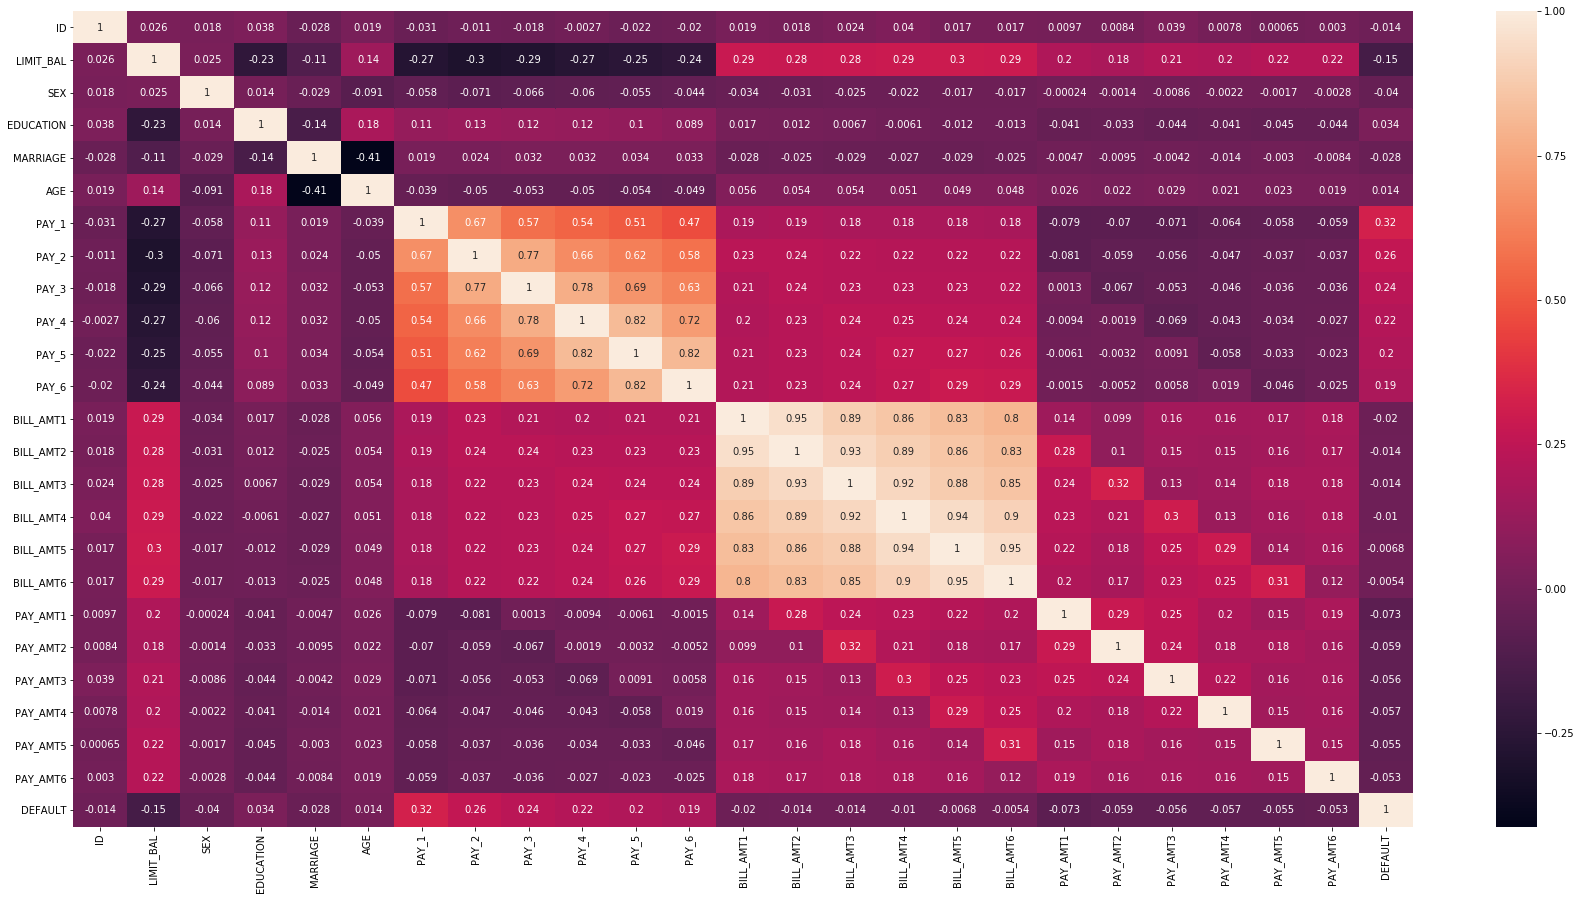

In [30]:
plt.figure(figsize=(30,15))
sns.heatmap(credit_card.corr(),annot=True)

- From the heat map, Highest correlation observed to the outcome variable is 0.32 with PAY_1 which indicates a positive correlation represents longer the period of Delay Payment, higher the chances of being a defaulters. 
- There is a strong multi collinearity exists among repayment status features (PAY1 ~ PAY6) and bill amount features (BILL_AMT1 ~ BILL_AMT6). Other than this there are no other significant correlation observed.

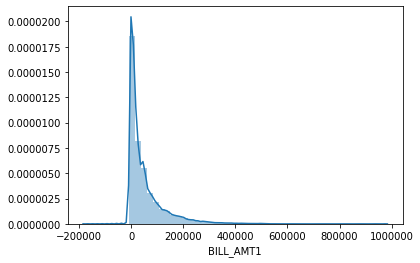

In [31]:
sns.distplot(credit_card['BILL_AMT1'])

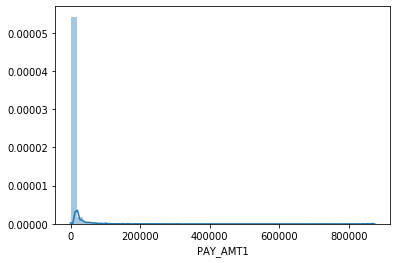

In [32]:
sns.distplot(credit_card['PAY_AMT1'])

In [22]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

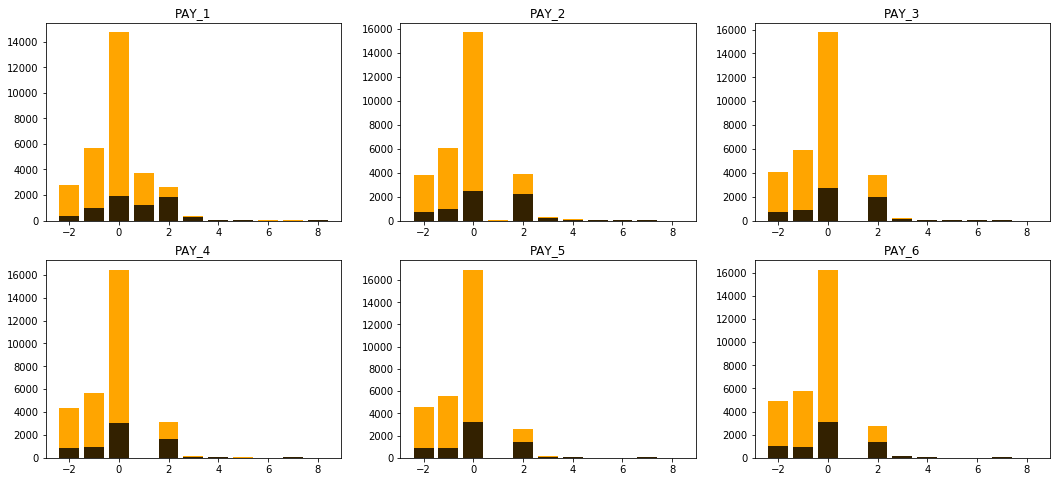

In [23]:
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = credit_card[pay_status_columns[i]].value_counts() # All the records are stored here
    x = credit_card[pay_status_columns[i]][(credit_card['DEFAULT']==1)].value_counts() #Only defaulters
    ax[row,col].bar(d.index, d, align='center', color='orange') 
    ax[row,col].bar(x.index, x, align='center', color='black', alpha=0.8)
    ax[row,col].set_title(pay_status_columns[i])

The above figure shows bar plot for count of defaulters and non-defaulter for each month's repayment status.

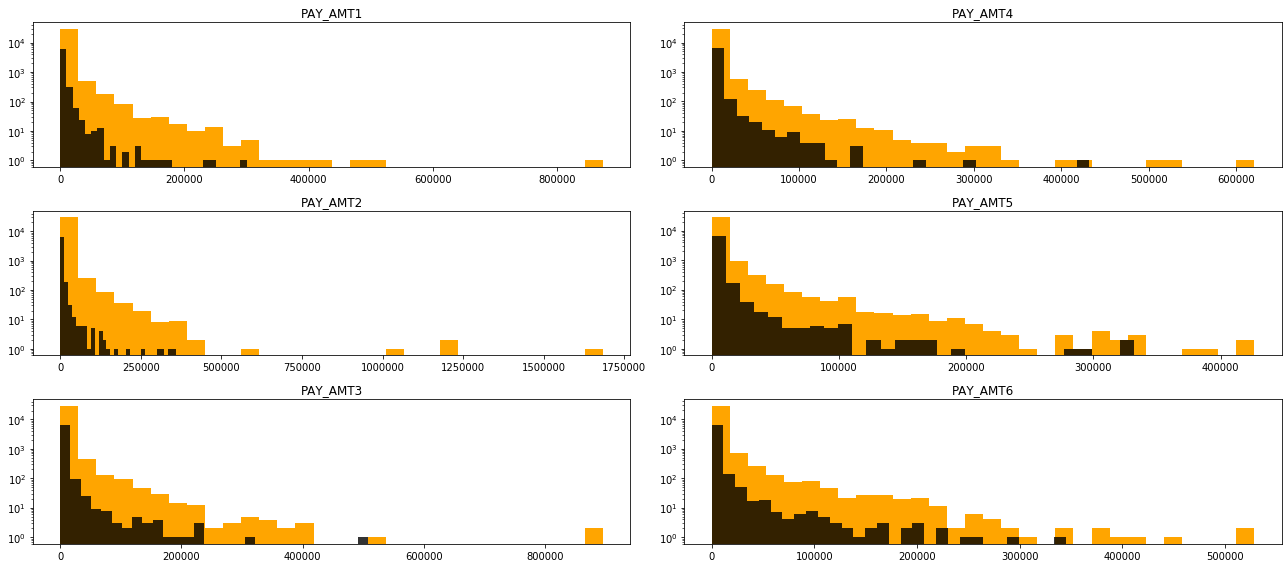

In [35]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit_card[pay_amt_columns[i]], 30, color ='orange')
    ax[row,col].hist(credit_card[pay_amt_columns[i]][(credit_card['DEFAULT']==1)],30,color='black',alpha = 0.8)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

- The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.
- From the graph it is can be seen that the almost 90% of the defaulters are between $0 to $200000

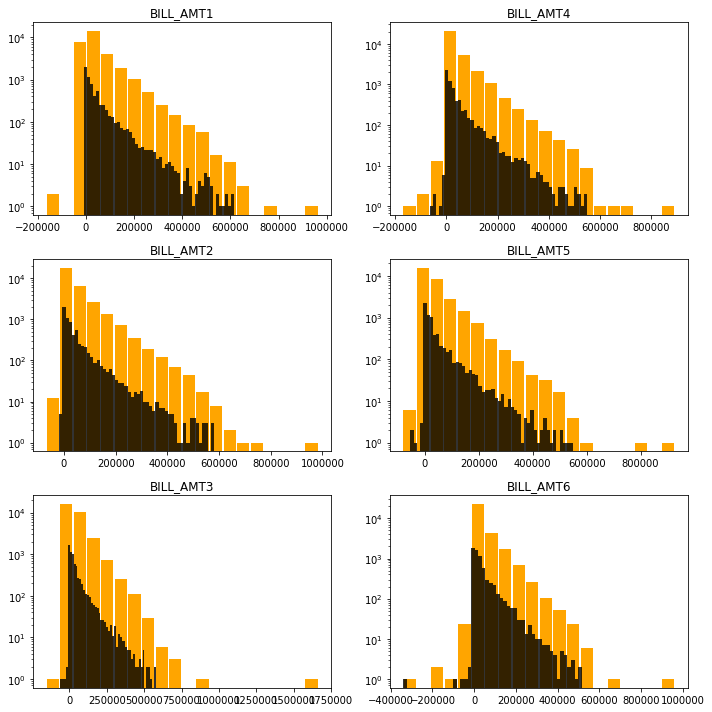

In [36]:
bill_amt_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit_card[bill_amt_columns[i]], 20,rwidth=0.9, color ='orange')
    ax[row,col].hist(credit_card[bill_amt_columns[i]][(credit_card['DEFAULT']==1)],50,color='black',alpha = 0.8)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

- The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters
- From the bill amount it is observed that most of the defaulters are in the low range section and count of the defaulters are gradually decreasing for the rise in bill amount

In [37]:
#credit_card.hist(figsize=(20,20))

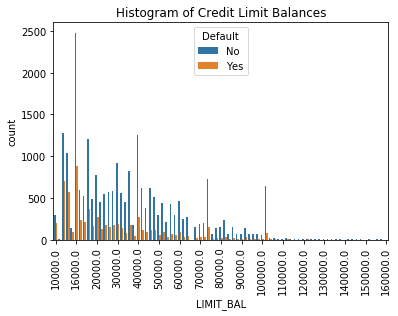

In [38]:
plot = sns.countplot(credit_card['LIMIT_BAL'],hue = credit_card['DEFAULT'])
plot.set_xticks(plot.get_xticks()[::5])
plot = plt.xticks(rotation=90)
plt.title('Histogram of Credit Limit Balances')
L = plt.legend(title='Default')
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')

Text(0.5, 1.0, 'Limit Balance and default distribution')

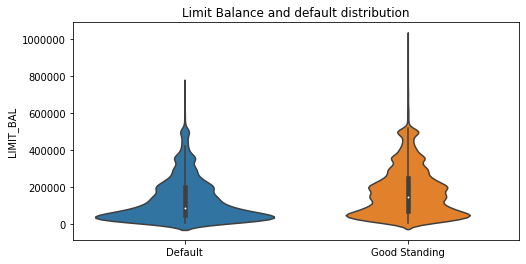

In [39]:
plt.figure(figsize=(8,4))
default_labs = {0:'Good Standing',1:'Default'}
default = [default_labs[x] for x in credit_card['DEFAULT']]
sns.violinplot(x=default, y='LIMIT_BAL',data=credit_card)
plt.title("Limit Balance and default distribution")

Text(0.5, 0, '')

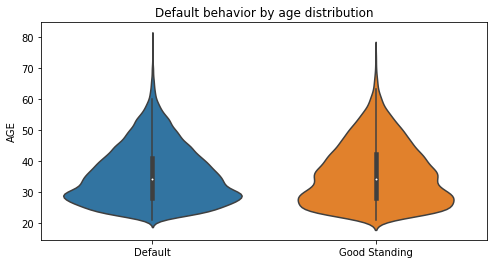

In [40]:
plt.figure(figsize=(8,4))
sns.violinplot('DEFAULT', y='AGE',data=credit_card)
plt.title('Default behavior by age distribution')
plt.xticks((0,1),('Default','Good Standing'))
plt.xlabel('')

In [41]:
credit_card.count(axis='columns').head()

0    25
1    25
2    25
3    25
4    25
dtype: int64

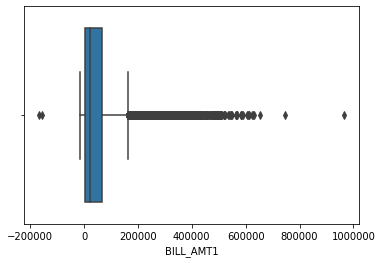

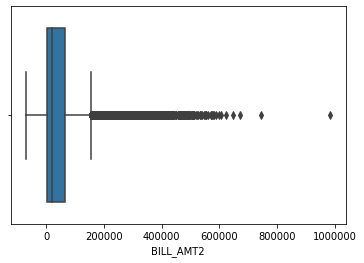

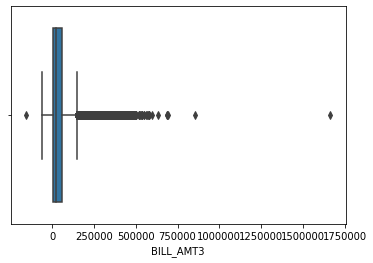

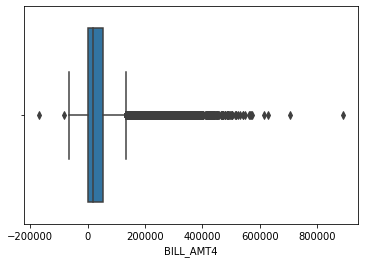

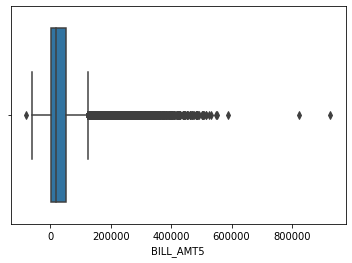

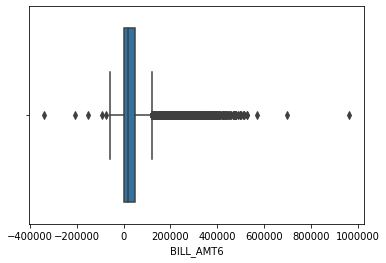

In [42]:
cols1 = credit_card[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
for i in cols1:
    sns.boxplot(credit_card[i])
    plt.show()

In [ ]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

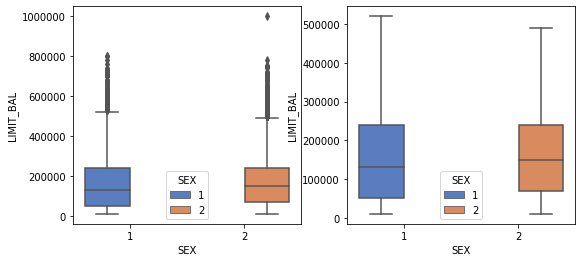

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,4))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit_card, palette="muted",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit_card, palette="muted",showfliers=False)
plt.show();

In [44]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=credit_card, palette="husl",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

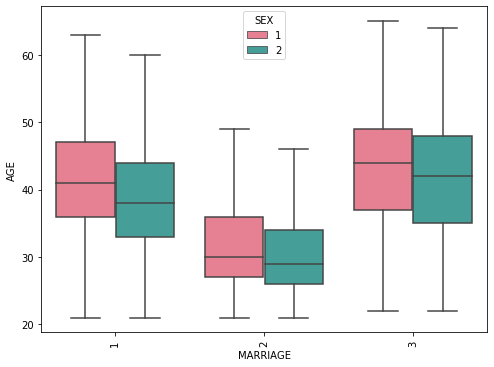

In [45]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

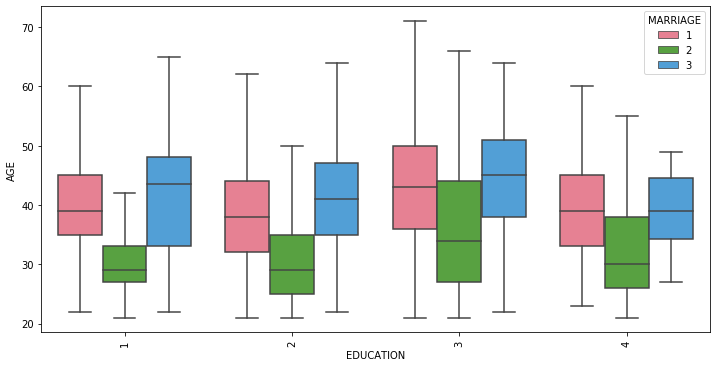

In [46]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

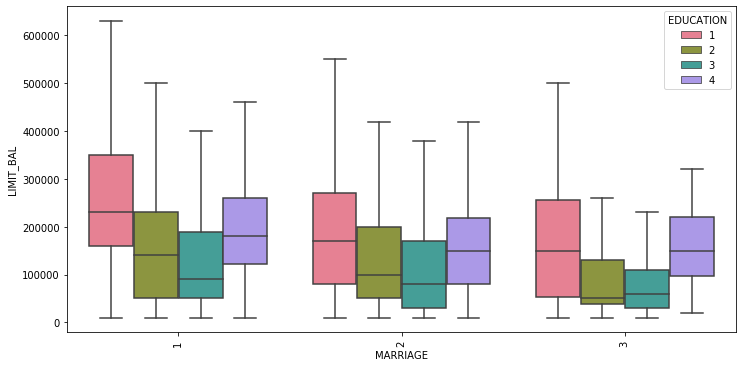

In [47]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### Statistical Testing

In [48]:
credit_card.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [49]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [50]:
credit_card[credit_card['DEFAULT']==0].head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


### Limit Balance Vs Default

In [51]:
cc0=credit_card[credit_card['DEFAULT']==0]
cc1=credit_card[credit_card['DEFAULT']==1]

In [52]:
ttest_ind(cc0['LIMIT_BAL'],cc1['LIMIT_BAL'])

Ttest_indResult(statistic=26.908521684796522, pvalue=1.3022439532597397e-157)

Limit Balances has a very small pvalue and thus rejects null hypothesis. Limit balance is a significant attribute in predicting defaulters.

### Sex Vs Default

In [53]:
from statsmodels.stats.proportion import proportions_ztest

Doubt that we needed to use two proportion t test

In [54]:
alpha = 0.05
table = pd.crosstab(credit_card['SEX'], credit_card["DEFAULT"])
chi2, p, dof, expected = chi2_contingency(table.values)
print("SEX and DEFAULT")
print("chi2 statistic : {:.3f} \np_value : {:.3f}".format(chi2, p))
if p <= alpha:
    print("Reject H0, It is a signficant variable in predicting Defaulters")
else:
    print("Accept H0, It is NOT a signficant variable in predicting Defaulters")

SEX and DEFAULT
chi2 statistic : 47.709 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters


In [55]:
credit_card['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [56]:
credit_card['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

### Education Vs Default

In [57]:
alpha = 0.05
table = pd.crosstab(credit_card['EDUCATION'], credit_card["DEFAULT"])
chi2, p, dof, expected = chi2_contingency(table.values)
print("EDUCATION and DEFAULT")
print("chi2 statistic : {:.3f} \np_value : {:.3f}".format(chi2, p))
if p <= alpha:
    print("Reject H0, It is a signficant variable in predicting Defaulters")
else:
    print("Accept H0, It is NOT a signficant variable in predicting Defaulters")

EDUCATION and DEFAULT
chi2 statistic : 160.410 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters


### Marriage Vs Default

In [58]:
alpha = 0.05
table = pd.crosstab(credit_card['MARRIAGE'], credit_card["DEFAULT"])
chi2, p, dof, expected = chi2_contingency(table.values)
print("MARRIAGE and DEFAULT")
print("chi2 statistic : {:.3f} \np_value : {:.3f}".format(chi2, p))
if p <= alpha:
    print("Reject H0, It is a signficant variable in predicting Defaulters")
else:
    print("Accept H0, It is NOT a signficant variable in predicting Defaulters")

MARRIAGE and DEFAULT
chi2 statistic : 28.130 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters


### Age Vs Default

In [59]:
ttest_ind(cc0['AGE'],cc1['AGE'])

Ttest_indResult(statistic=-2.40594177499625, pvalue=0.01613684589016383)

Age is also a significant attribute to predict defaulter

### Pay Vs Default

In [60]:
pay_status_columns

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [61]:
pay_status_columns = getColumnsNames('PAY_')
for i in pay_status_columns:
    alpha = 0.05
    table = pd.crosstab(credit_card[i], credit_card["DEFAULT"])
    chi2, p, dof, expected = chi2_contingency(table.values)
    print(i,"and DEFAULT")
    print("chi2 statistic : {:.3f} \np_value : {:.3f}".format(chi2, p))
    if p <= alpha:
        print("Reject H0, It is a signficant variable in predicting Defaulters")
    else:
        print("Accept H0, It is NOT a signficant variable in predicting Defaulters")  
    print()

PAY_1 and DEFAULT
chi2 statistic : 5365.965 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters

PAY_2 and DEFAULT
chi2 statistic : 3474.467 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters

PAY_3 and DEFAULT
chi2 statistic : 2622.462 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters

PAY_4 and DEFAULT
chi2 statistic : 2341.470 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters

PAY_5 and DEFAULT
chi2 statistic : 2197.695 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters

PAY_6 and DEFAULT
chi2 statistic : 1886.835 
p_value : 0.000
Reject H0, It is a signficant variable in predicting Defaulters



### Bill Amounts Vs Default

In [62]:
ttest_ind(cc0['BILL_AMT1'],cc1['BILL_AMT1'])

Ttest_indResult(statistic=3.403018001170964, pvalue=0.0006673295491221741)

In [63]:
ttest_ind(cc0['BILL_AMT2'],cc1['BILL_AMT2'])

Ttest_indResult(statistic=2.458503181278919, pvalue=0.013957362392434761)

In [64]:
ttest_ind(cc0['BILL_AMT3'],cc1['BILL_AMT3'])

Ttest_indResult(statistic=2.4381115045173596, pvalue=0.014769982710723002)

In [65]:
ttest_ind(cc0['BILL_AMT4'],cc1['BILL_AMT4'])

Ttest_indResult(statistic=1.759188785998342, pvalue=0.07855564157651403)

In [66]:
ttest_ind(cc0['BILL_AMT5'],cc1['BILL_AMT5'])

Ttest_indResult(statistic=1.1709344117538458, pvalue=0.24163444291382874)

In [67]:
ttest_ind(cc0['BILL_AMT6'],cc1['BILL_AMT6'])

Ttest_indResult(statistic=0.9304946490374802, pvalue=0.3521225212306479)

Statistical test suggest that bill amounts 4,5 and 6 doesn't have any significance in predicting defaulters

### Payment Amounts Vs Default

In [68]:
ttest_ind(cc0['PAY_AMT1'],cc1['PAY_AMT1'])

Ttest_indResult(statistic=12.665062557364722, pvalue=1.1464876142241624e-36)

In [69]:
ttest_ind(cc0['PAY_AMT2'],cc1['PAY_AMT2'])

Ttest_indResult(statistic=10.163243786034139, pvalue=3.1666567628387115e-24)

In [70]:
ttest_ind(cc0['PAY_AMT3'],cc1['PAY_AMT3'])

Ttest_indResult(statistic=9.757971658572275, pvalue=1.841770291503132e-22)

In [71]:
ttest_ind(cc0['PAY_AMT4'],cc1['PAY_AMT4'])

Ttest_indResult(statistic=9.858397459473979, pvalue=6.830941601370003e-23)

In [72]:
ttest_ind(cc0['PAY_AMT5'],cc1['PAY_AMT5'])

Ttest_indResult(statistic=9.561893159941787, pvalue=1.2413447727776169e-21)

In [73]:
ttest_ind(cc0['PAY_AMT6'],cc1['PAY_AMT6'])

Ttest_indResult(statistic=9.224372354111592, pvalue=3.033589072770243e-20)

All the payment amounts play a significant role in predicting defaulters

In [74]:
credit_card[['SEX','EDUCATION','AGE','MARRIAGE','PAY_1',
            'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,SEX,EDUCATION,AGE,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,35.485500,1.557267,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,0.489129,0.744494,9.217904,0.521405,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,1.000000,1.000000,21.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,28.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,34.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,41.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,79.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


### BASE MODEL

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

In [14]:
X=credit_card.drop('DEFAULT',axis=1)
y=credit_card['DEFAULT']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=12)

#### Statsmodel

In [16]:
import statsmodels.api as sm

In [17]:
Xc=sm.add_constant(X)

In [18]:
model=sm.Logit(y,Xc,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.464554
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29975
Method:                           MLE   Df Model:                           24
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.1209
Time:                        11:28:22   Log-Likelihood:                -13937.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6211      0.121     -5.116      0.000      -0.859      -0.383
ID         -1.385e-06   1.75e-06     -0.792      0.429   -4.81e-06    2.04e-06
LIMIT_BAL  -7.618e-07   1.57e-07     -4.848      0.000   -1.07e-06   -4.54e-07
SEX           -0.1098      0.031     -3.577      0.000      -0.170      -0.050
EDUCATION     -0.0994      0.022     -4.511      0.000      -0.143      -0.056
MARRIAGE      -0.1740      0.032     -5.481      0.000      -0.236      -0.112
AGE            0.0070      0.002      3.906      0.000       0.003       0.010
PAY_1          0.5770      0.018     32.602      0.000       0.542       0.612
PAY_2          0.0831      0.020      4.117      0.000       0.044       0.123
PAY_3          0.0721      0.023      3.188      0.001       0.028       0.116
PAY_4          0.0248      0.025      0.990      0.322      -0.024       0.074
PAY_5          0.0331      0.027      1.231      0.218      -0.020       0.086
PAY_6          0.0082      0.022      0.369      0.712      -0.035       0.052
BILL_AMT1  -5.508e-06   1.14e-06     -4.848      0.000   -7.74e-06   -3.28e-06
BILL_AMT2   2.341e-06   1.51e-06      1.554      0.120   -6.11e-07    5.29e-06
BILL_AMT3   1.349e-06   1.32e-06      1.019      0.308   -1.25e-06    3.94e-06
BILL_AMT4  -8.739e-08   1.35e-06     -0.065      0.948   -2.74e-06    2.56e-06
BILL_AMT5   5.167e-07   1.52e-06      0.340      0.734   -2.47e-06     3.5e-06
BILL_AMT6   4.366e-07    1.2e-06      0.365      0.715   -1.91e-06    2.78e-06
PAY_AMT1    -1.36e-05    2.3e-06     -5.901      0.000   -1.81e-05   -9.08e-06
PAY_AMT2   -9.621e-06   2.09e-06     -4.595      0.000   -1.37e-05   -5.52e-06
PAY_AMT3    -2.73e-06   1.72e-06     -1.587      0.113    -6.1e-06    6.42e-07
PAY_AMT4   -3.968e-06   1.78e-06     -2.223      0.026   -7.47e-06    -4.7e-07
PAY_AMT5   -3.355e-06   1.78e-06     -1.888      0.059   -6.84e-06    1.28e-07
PAY_AMT6   -2.072e-06    1.3e-06     -1.599      0.110   -4.61e-06    4.68e-07
==============================================================================
"""

Statistical summary of the independent variables with p-value can be seen with the help of the logit function in statsmodel.

#### sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [21]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]
print("Confusion Matrix - Train: ",'\n',confusion_matrix(y_train,y_train_pred))
print("Overall Accuracy - Train: ",accuracy_score(y_train,y_train_pred))
print('ROC score: ',roc_auc_score(y_train, y_train_prob))
print('Classification Report- ',classification_report(y_train, y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n')
print("Confusion Matrix - Test: ",'\n',confusion_matrix(y_test,y_test_pred))
print("Overall Accuracy - Test: ",accuracy_score(y_test,y_test_pred))
print('ROC score: ',roc_auc_score(y_test, y_test_prob))
print('Classification Report- ',classification_report(y_test, y_test_pred))

Confusion Matrix - Train:  
 [[16370     1]
 [ 4628     1]]
Overall Accuracy - Train:  0.7795714285714286
ROC score:  0.6470732993848791
Classification Report-                precision    recall  f1-score   support

           0       0.78      1.00      0.88     16371
           1       0.50      0.00      0.00      4629

    accuracy                           0.78     21000
   macro avg       0.64      0.50      0.44     21000
weighted avg       0.72      0.78      0.68     21000



Confusion Matrix - Test:  
 [[6992    1]
 [2007    0]]
Overall Accuracy - Test:  0.7768888888888889
ROC score:  0.6458737191173662
Classification Report-                precision    recall  f1-score   support

           0       0.78      1.00      0.87      6993
           1       0.00      0.00      0.00      2007

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



We can see that our model has misclassified all the deafulters and correctly classified all the non-defaulters. Since the class of non-defaulters are more in our class our model has classified almost all the records as non-defaulters this means the model has learnt nothing from the data. 

### Feature Selection

### RFECV

In [373]:
from sklearn.feature_selection import RFECV,RFE

In [235]:
rfecv=RFECV(estimator=lr,step=1,scoring='roc_auc')
rfecv.fit(X,y)
print("Optimal Number of features",rfecv.n_features_)

Optimal Number of features 11


In [236]:
rfecv.ranking_

array([ 5, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  3, 12,  9, 14,
       11,  1,  2,  7,  6,  8, 13])

In [237]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

RFECV says that columns 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1' are significant columns in predicting y.

### Backward Elimination

In [238]:
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.pvalues

const         4.338264e-69
ID            7.785990e-01
LIMIT_BAL     2.687362e-05
SEX           1.576507e-03
EDUCATION     2.477217e-06
MARRIAGE      2.244716e-08
AGE           1.014808e-06
PAY_1        8.320038e-257
PAY_2         5.569895e-09
PAY_3         1.100955e-03
PAY_4         3.931501e-01
PAY_5         1.905674e-01
PAY_6         8.150421e-01
BILL_AMT1     4.509268e-08
BILL_AMT2     3.229193e-01
BILL_AMT3     8.551752e-01
BILL_AMT4     6.848777e-01
BILL_AMT5     8.897321e-01
BILL_AMT6     4.115804e-01
PAY_AMT1      2.874727e-05
PAY_AMT2      1.517432e-01
PAY_AMT3      8.640438e-01
PAY_AMT4      1.732385e-01
PAY_AMT5      7.057007e-02
PAY_AMT6      4.654614e-01
dtype: float64

In [239]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Backward Elimination selected features are :",selected_features_BE)

Backward Elimination selected features are : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_5', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT5']


### RFE

In [240]:
rfe = RFE(lr, 11)

In [241]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lr.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False  True False False False False False]
[ 5 10  1  1  1  1  1  1  1  1  1  1  4  3 12  9 14 11  1  2  7  6  8 13]


In [242]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.784556


In [243]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print("RFE Selected Features : ",selected_features_rfe)

RFE Selected Features :  Index(['ID', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'],
      dtype='object')


We can see that from different feature selection techniques we can see that each one results in different features and looks like if feature engineering is done correctly for the features then we could extract some valuable information.

### VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
ID,1.014481
LIMIT_BAL,1.564365
SEX,1.023943
EDUCATION,1.137378
MARRIAGE,1.225624
AGE,1.277737
PAY_1,1.921334
PAY_2,3.174445
PAY_3,3.659029
PAY_4,4.293082


Bill amount has high VIF values so it has to be either removed or feature engineered.

In [24]:
X.drop('ID',axis=1,inplace=True)

#### BASELINE PIPELINING

In [448]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Class Columns used to apply features transformation
class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

# List of numerical features
numeric = [
    'LIMIT_BAL',
    'AGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
    'TOT_BILL_AMT',
    
]

# List of categorical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# Build feature engineering pipeline step
features = FeatureUnion([
        ('numeric', make_pipeline(Columns(names=numeric),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=categorical),OneHotEncoder(sparse=False)))
    ])


In [449]:
num_folds=10
seed=3
from sklearn.model_selection import StratifiedKFold

In [450]:
column_names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results = pd.DataFrame(columns = column_names)

In [54]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

#### Building Pipeline step

In [453]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(class_weight='balanced'),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'NB': GaussianNB(),
    'svm': SVC(class_weight='balanced'),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results = cross_validate(tested_models[model],X_train, y_train, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model,cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [454]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.595667,0.298366,0.617409,0.402286,0.637009
1,knn,0.747238,0.356823,0.182976,0.241710,0.601340
2,DT,0.727714,0.382898,0.384316,0.383504,0.604564
3,NB,0.369286,0.246374,0.903865,0.387197,0.675187
4,svm,0.570381,0.294856,0.682006,0.411669,0.663979
5,Ada,0.815524,0.672877,0.319072,0.432552,0.772964
6,RFC,0.816619,0.648228,0.368330,0.469443,0.770236
7,LGBM,0.822048,0.676680,0.368975,0.477322,0.778096
8,GB,0.820810,0.673991,0.362924,0.471365,0.778913


In [456]:
models=[]
models.append(('LR',LogisticRegression(class_weight='balanced')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier(class_weight='balanced')))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight='balanced')))
models.append(('AB',AdaBoostClassifier()))
models.append(('RF',RandomForestClassifier(criterion= 'entropy',n_estimators = 175)))
models.append(('LGBM',lgb.LGBMClassifier()))

LR:0.407415 (0.000502)


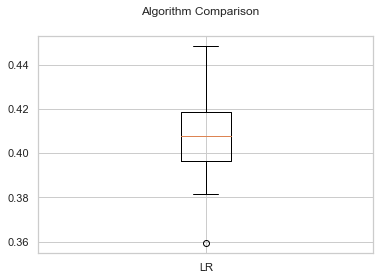

KNN:0.253133 (0.000446)


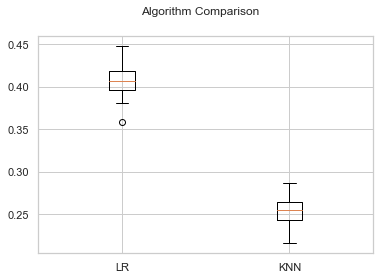

DT:0.401735 (0.000348)


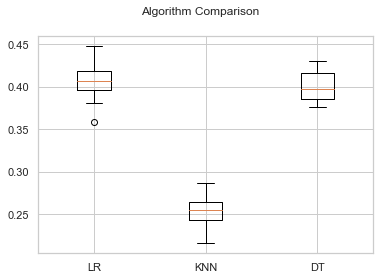

NB:0.386606 (0.000401)


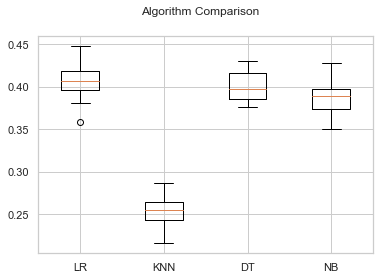

SVM:0.413247 (0.000257)


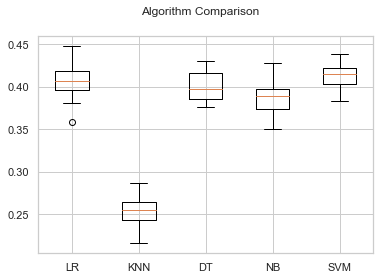

AB:0.437474 (0.000509)


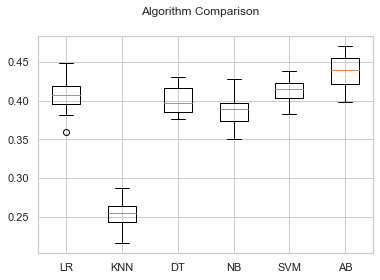

RF:0.478916 (0.000697)


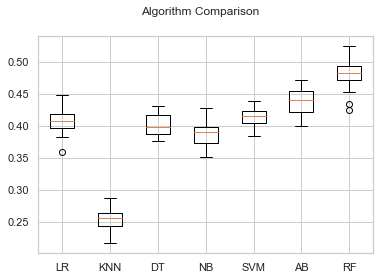

LGBM:0.472960 (0.000498)


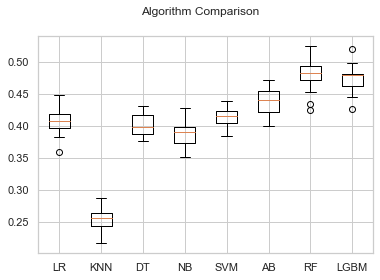

In [457]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(shuffle=True,n_splits=15)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring="f1")
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    fig= plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [68]:
credit2=credit_card.copy()

In [72]:
credit2.drop(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1,inplace=True)

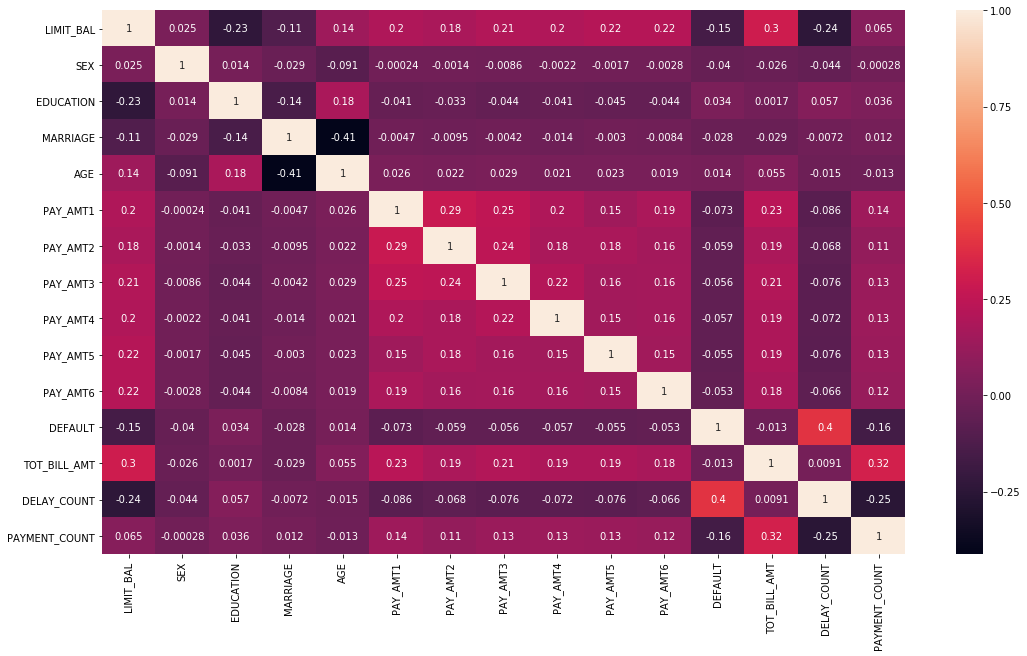

In [73]:
plt.figure(figsize=(18,10))
sns.heatmap(credit2.corr(),annot=True)

### Feature Engineering

In [25]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

In [26]:
bill_amt_columns =  getColumnsNames('BILL_AMT')
pay_amt_columns = getColumnsNames('PAY_AMT')
pay_status_columns = getColumnsNames('PAY_')
print("Bill Amount columns",bill_amt_columns)
print("Pay Amount columns",pay_amt_columns)
print("Pay Status columns",pay_status_columns)

Bill Amount columns ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Pay Amount columns ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Pay Status columns ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [27]:
credit_card['TOT_BILL_AMT']=credit_card[bill_amt_columns].sum(axis=1)

In [28]:
credit_card.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOT_BILL_AMT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0


In [29]:
credit_card.drop(bill_amt_columns,axis=1,inplace=True)

In [30]:
X=credit_card.drop('DEFAULT',axis=1)
y=credit_card['DEFAULT']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=12)

In [32]:
Xc=sm.add_constant(X)

In [33]:
model=sm.Logit(y,Xc,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.465190
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29980
Method:                           MLE   Df Model:                           19
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.1197
Time:                        11:29:02   Log-Likelihood:                -13956.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6305      0.121     -5.201      0.000      -0.868      -0.393
ID           -1.331e-06   1.74e-06     -0.766      0.444   -4.74e-06    2.08e-06
LIMIT_BAL    -8.083e-07   1.57e-07     -5.161      0.000   -1.12e-06   -5.01e-07
SEX             -0.1037      0.031     -3.386      0.001      -0.164      -0.044
EDUCATION       -0.1056      0.022     -4.805      0.000      -0.149      -0.063
MARRIAGE        -0.1753      0.032     -5.529      0.000      -0.237      -0.113
AGE              0.0070      0.002      3.955      0.000       0.004       0.011
PAY_1            0.5814      0.018     32.754      0.000       0.547       0.616
PAY_2            0.0716      0.020      3.551      0.000       0.032       0.111
PAY_3            0.0782      0.023      3.459      0.001       0.034       0.122
PAY_4            0.0283      0.025      1.130      0.258      -0.021       0.077
PAY_5            0.0378      0.027      1.409      0.159      -0.015       0.090
PAY_6            0.0173      0.022      0.791      0.429      -0.026       0.060
PAY_AMT1     -1.084e-05   2.13e-06     -5.096      0.000    -1.5e-05   -6.67e-06
PAY_AMT2     -8.383e-06    1.9e-06     -4.413      0.000   -1.21e-05   -4.66e-06
PAY_AMT3     -2.688e-06   1.49e-06     -1.799      0.072   -5.62e-06     2.4e-07
PAY_AMT4     -3.689e-06   1.56e-06     -2.364      0.018   -6.75e-06   -6.31e-07
PAY_AMT5     -3.431e-06   1.49e-06     -2.307      0.021   -6.35e-06   -5.16e-07
PAY_AMT6      -2.76e-06   1.27e-06     -2.172      0.030   -5.25e-06    -2.7e-07
TOT_BILL_AMT -2.462e-07   5.37e-08     -4.580      0.000   -3.51e-07   -1.41e-07
================================================================================
"""

Now bill amount has become a significant variable.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

In [34]:
credit_card['DELAY_COUNT']=credit_card[pay_status_columns][credit_card[pay_status_columns]>0].count(axis=1)

In [35]:
credit_card.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOT_BILL_AMT,DELAY_COUNT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,2
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,2


In [36]:
credit_card['PAYMENT_COUNT']=credit_card[pay_amt_columns][credit_card[pay_amt_columns]>0].count(axis=1)

In [37]:
credit_card.drop('ID',axis=1,inplace=True)

In [38]:
credit_card.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOT_BILL_AMT,DELAY_COUNT,PAYMENT_COUNT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,2,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,2,4
2,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,0,6
3,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,0,6
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,0,6


In [39]:
X=credit_card.drop('DEFAULT',axis=1)
y=credit_card['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=12)

### Feature Selection

### RFECV

In [262]:
from sklearn.feature_selection import RFECV,RFE

In [263]:
rfecv=RFECV(estimator=lr,step=1,scoring='roc_auc')
rfecv.fit(X,y)
print("Optimal Number of features",rfecv.n_features_)

Optimal Number of features 15


In [264]:
rfecv.ranking_

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 5, 6, 1, 1])

In [265]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TOT_BILL_AMT', 'DELAY_COUNT',
       'PAYMENT_COUNT'],
      dtype='object')

RFECV says that columns 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1' are significant columns in predicting y.

### Backward Elimination

In [266]:
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.pvalues

const             7.486042e-38
LIMIT_BAL         9.712926e-27
SEX               1.012706e-04
EDUCATION         5.541219e-02
MARRIAGE          1.220229e-05
AGE               4.141718e-03
PAY_1             1.317639e-70
PAY_2             1.427971e-02
PAY_3             3.249512e-03
PAY_4             1.260863e-03
PAY_5             1.128220e-01
PAY_6             1.054060e-02
PAY_AMT1          6.867963e-03
PAY_AMT2          8.230145e-02
PAY_AMT3          6.679563e-01
PAY_AMT4          2.020750e-01
PAY_AMT5          4.099902e-01
PAY_AMT6          3.920961e-01
TOT_BILL_AMT      5.418915e-06
DELAY_COUNT      1.299805e-291
PAYMENT_COUNT     2.035799e-08
dtype: float64

In [267]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Backward Elimination selected features are :",selected_features_BE)

Backward Elimination selected features are : ['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'TOT_BILL_AMT', 'DELAY_COUNT', 'PAYMENT_COUNT']


### RFE

In [268]:
rfe = RFE(lr, 11)

In [269]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lr.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True  True  True  True  True  True False
 False False False False False False  True  True]
[ 8  1  1  1  2  1  1  1  1  1  1  3  4  7  5  6  9 10  1  1]


In [270]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.812556


In [271]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print("RFE Selected Features : ",selected_features_rfe)

RFE Selected Features :  Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'DELAY_COUNT', 'PAYMENT_COUNT'],
      dtype='object')


We can see that from different feature selection techniques we can see that we could see important of different features and we could sense that each and every feature is very important for our analysis. Looks like if feature engineering is done correctly for the features then we could extract some valuable information.

### VIF

In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
LIMIT_BAL,1.591081
SEX,1.023275
EDUCATION,1.138374
MARRIAGE,1.226448
AGE,1.280597
PAY_1,2.173933
PAY_2,3.314323
PAY_3,3.746509
PAY_4,4.352847
PAY_5,4.784719


Multi-collinearity is removed between the variables.

### SMOTE

In [40]:
# Deal with imbalance using SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [41]:
# Smote train dataset using a 50-50 split
smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Transform resample X_train into DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled)

In [42]:
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.446384
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29979
Method:                           MLE   Df Model:                           20
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.1553
Time:                        11:29:23   Log-Likelihood:                -13392.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9079      0.137     -6.625      0.000      -1.176      -0.639
LIMIT_BAL     -1.836e-06   1.68e-07    -10.903      0.000   -2.17e-06   -1.51e-06
SEX              -0.1252      0.032     -3.962      0.000      -0.187      -0.063
EDUCATION        -0.0490      0.022     -2.187      0.029      -0.093      -0.005
MARRIAGE         -0.1471      0.033     -4.493      0.000      -0.211      -0.083
AGE               0.0051      0.002      2.745      0.006       0.001       0.009
PAY_1             0.3007      0.018     16.313      0.000       0.265       0.337
PAY_2            -0.0642      0.020     -3.154      0.002      -0.104      -0.024
PAY_3            -0.0485      0.022     -2.164      0.030      -0.092      -0.005
PAY_4            -0.0648      0.025     -2.622      0.009      -0.113      -0.016
PAY_5            -0.0465      0.027     -1.741      0.082      -0.099       0.006
PAY_6            -0.0404      0.022     -1.824      0.068      -0.084       0.003
PAY_AMT1      -7.532e-06    1.9e-06     -3.961      0.000   -1.13e-05    -3.8e-06
PAY_AMT2      -6.592e-06   1.73e-06     -3.809      0.000   -9.98e-06    -3.2e-06
PAY_AMT3      -1.698e-06   1.36e-06     -1.246      0.213   -4.37e-06    9.72e-07
PAY_AMT4      -2.955e-06    1.5e-06     -1.969      0.049    -5.9e-06   -1.37e-08
PAY_AMT5      -1.771e-06   1.41e-06     -1.256      0.209   -4.53e-06    9.92e-07
PAY_AMT6      -1.818e-06   1.25e-06     -1.460      0.144   -4.26e-06    6.22e-07
TOT_BILL_AMT   3.589e-07   5.59e-08      6.420      0.000    2.49e-07    4.68e-07
DELAY_COUNT       0.4622      0.018     25.033      0.000       0.426       0.498
PAYMENT_COUNT    -0.0669      0.011     -5.929      0.000      -0.089      -0.045
=================================================================================
"""

In [43]:
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [44]:
lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
X_train.shape

(24000, 20)

In [46]:
X_train_resampled.shape

(37432, 20)

In [47]:
y_train_pred=lr.predict(X_train_resampled)
y_train_prob=lr.predict_proba(X_train_resampled)[:,1]
print("Confusion Matrix - Train: ",'\n',confusion_matrix(y_train_resampled,y_train_pred))
print("Overall Accuracy - Train: ",accuracy_score(y_train_resampled,y_train_pred))
print('ROC score: ',roc_auc_score(y_train_resampled, y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n')
print("Confusion Matrix - Test: ",'\n',confusion_matrix(y_test,y_test_pred))
print("Overall Accuracy - Test: ",accuracy_score(y_test,y_test_pred))
print('ROC score: ',roc_auc_score(y_test, y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train:  
 [[12205  6511]
 [ 5692 13024]]
Overall Accuracy - Train:  0.6739955118615089
ROC score:  0.7299563820302535
Classification Report- 
               precision    recall  f1-score   support

           0       0.68      0.65      0.67     18716
           1       0.67      0.70      0.68     18716

    accuracy                           0.67     37432
   macro avg       0.67      0.67      0.67     37432
weighted avg       0.67      0.67      0.67     37432



Confusion Matrix - Test:  
 [[3015 1633]
 [ 454  898]]
Overall Accuracy - Test:  0.6521666666666667
ROC score:  0.7167221824746152
Classification Report- 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      4648
           1       0.35      0.66      0.46      1352

    accuracy                           0.65      6000
   macro avg       0.61      0.66      0.60      6000
weighted avg       0.75      0.65      0.68      6000



#### UnderSampling

In [48]:
credit_card.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOT_BILL_AMT,DELAY_COUNT,PAYMENT_COUNT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,2,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,2,4


In [49]:
#### Undersampling

X_train.head(2)

Xytrain = pd.concat([X_train, y_train], axis = 1)
print('Before Undersampling: ', '\n', Xytrain['DEFAULT'].value_counts())

Xytrain0 = Xytrain[Xytrain['DEFAULT'] == 0]
Xytrain1 = Xytrain[Xytrain['DEFAULT'] == 1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)
print('\n')

Xytrain0_us = Xytrain0.sample(len1, random_state = 3)
Xytrain_us = pd.concat([Xytrain0_us, Xytrain1], axis = 0)

print('After Undersampling: ', '\n',  Xytrain_us['DEFAULT'].value_counts())

y_train_us = Xytrain_us['DEFAULT']
X_train_us = Xytrain_us.drop('DEFAULT', axis = 1)

Before Undersampling:  
 0    18716
1     5284
Name: DEFAULT, dtype: int64


After Undersampling:  
 1    5284
0    5284
Name: DEFAULT, dtype: int64


In [50]:
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [51]:
lr.fit(X_train_us,y_train_us)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_train_pred=lr.predict(X_train_us)
y_train_prob=lr.predict_proba(X_train_us)[:,1]
print("Confusion Matrix - Train: ",'\n',confusion_matrix(y_train_us,y_train_pred))
print("Overall Accuracy - Train: ",accuracy_score(y_train_us,y_train_pred))
print('ROC score: ',roc_auc_score(y_train_us, y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n')
print("Confusion Matrix - Test: ",'\n',confusion_matrix(y_test,y_test_pred))
print("Overall Accuracy - Test: ",accuracy_score(y_test,y_test_pred))
print('ROC score: ',roc_auc_score(y_test, y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train:  
 [[4345  939]
 [2274 3010]]
Overall Accuracy - Train:  0.6959689629068887
ROC score:  0.7450174164962314
Classification Report- 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73      5284
           1       0.76      0.57      0.65      5284

    accuracy                           0.70     10568
   macro avg       0.71      0.70      0.69     10568
weighted avg       0.71      0.70      0.69     10568



Confusion Matrix - Test:  
 [[3791  857]
 [ 565  787]]
Overall Accuracy - Test:  0.763
ROC score:  0.7400992919267942
Classification Report- 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4648
           1       0.48      0.58      0.53      1352

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



### Model Pipelining

In [517]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Class Columns used to apply features transformation
class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

# List of numerical features
numeric = [
    'LIMIT_BAL',
    'AGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
    'TOT_BILL_AMT',
    
]

# List of categorical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','DELAY_COUNT','PAYMENT_COUNT']

# Build feature engineering pipeline step
features = FeatureUnion([
        ('numeric', make_pipeline(Columns(names=numeric),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=categorical),OneHotEncoder(sparse=False)))
    ])


In [518]:
num_folds=10
seed=3

In [519]:
from sklearn.model_selection import StratifiedKFold

In [520]:
column_names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results = pd.DataFrame(columns = column_names)

In [521]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier 
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

#### Pipelining without Sampling

In [522]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results = cross_validate(tested_models[model],X_train, y_train, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model,cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [523]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.643390
1,knn,0.752333,0.347208,0.143272,0.202721,0.586634
2,DT,0.733500,0.399148,0.415596,0.407009,0.619688
3,NB,0.363125,0.244513,0.905566,0.385052,0.653958
4,svm,0.779833,0.000000,0.000000,0.000000,0.518717
5,Ada,0.819583,0.676335,0.347472,0.458790,0.779585
6,RFC,0.818000,0.646458,0.383427,0.481131,0.770804
7,LGBM,0.821125,0.670168,0.370368,0.476737,0.779387


#### UnderSampled Pipeline

In [524]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results = cross_validate(tested_models[model],X_train_us, y_train_us, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model+' UnderSampling',cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [525]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.643390
1,knn,0.752333,0.347208,0.143272,0.202721,0.586634
2,DT,0.733500,0.399148,0.415596,0.407009,0.619688
3,NB,0.363125,0.244513,0.905566,0.385052,0.653958
4,svm,0.779833,0.000000,0.000000,0.000000,0.518717
5,Ada,0.819583,0.676335,0.347472,0.458790,0.779585
6,RFC,0.818000,0.646458,0.383427,0.481131,0.770804
7,LGBM,0.821125,0.670168,0.370368,0.476737,0.779387
8,lr UnderSampling,0.584506,0.592513,0.545979,0.554857,0.632591
9,knn UnderSampling,0.577402,0.578567,0.570213,0.574299,0.600384


#### SMOTE Pipeline

In [526]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results = cross_validate(tested_models[model],X_train_resampled, y_train_resampled, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model+' smote',cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [527]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.643390
1,knn,0.752333,0.347208,0.143272,0.202721,0.586634
2,DT,0.733500,0.399148,0.415596,0.407009,0.619688
3,NB,0.363125,0.244513,0.905566,0.385052,0.653958
4,svm,0.779833,0.000000,0.000000,0.000000,0.518717
5,Ada,0.819583,0.676335,0.347472,0.458790,0.779585
6,RFC,0.818000,0.646458,0.383427,0.481131,0.770804
7,LGBM,0.821125,0.670168,0.370368,0.476737,0.779387
8,lr UnderSampling,0.584506,0.592513,0.545979,0.554857,0.632591
9,knn UnderSampling,0.577402,0.578567,0.570213,0.574299,0.600384


In [528]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [ LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

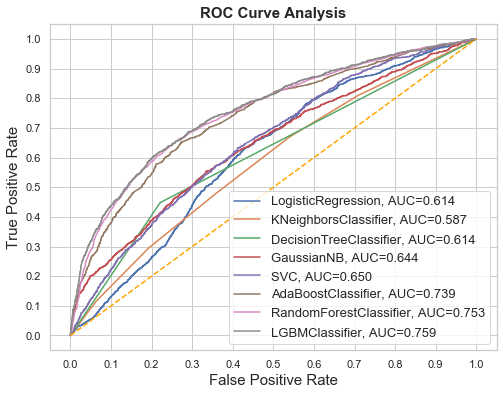

In [529]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show() 

In [530]:
result_table1 = pd.DataFrame(columns=['classifiers',
                                      'no_skill',
                                        'model_recall', 
                                        'model_precision'])

In [531]:
model_f1=[] 
model_auc=[]
model_precision=[]
model_recall=[]
no_skill=[]

In [532]:
classifiers = [LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()] 

In [533]:
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [534]:
from sklearn.metrics import precision_recall_curve,f1_score

In [535]:
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    yproba = model.predict_proba(X_test)[:,1]
    
    # predict class values
    yhat = model.predict(X_test)
    model_precision, model_recall, _= precision_recall_curve(y_test, yproba)
    model_f1, model_auc = f1_score(y_test, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False): f1=0.302 auc=0.280
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): f1=0.354 auc=0.324
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): f1=0.407 auc=0.473


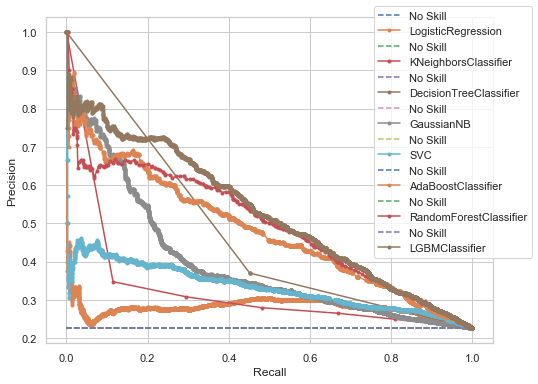

In [536]:
fig = plt.figure(figsize=(8,6))
#marker='.', label=result_table1.loc[i]['classifiers']
for i in result_table1.index:
    #r1=np.vectorize(result_table1.loc[i]['model_recall'])
   # r2=np.vectorize(result_table1.loc[i]['model_precision'])
    r1=result_table1.loc[i]['model_recall']
    r2=result_table1.loc[i]['model_precision']
    pyplot.plot( [0, 1],[result_table1.loc[i]['no_skill'], result_table1.loc[i]['no_skill']], linestyle='--', label='No Skill')
    pyplot.plot(r1, r2,
                
                marker='.', label=i)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
pyplot.show()

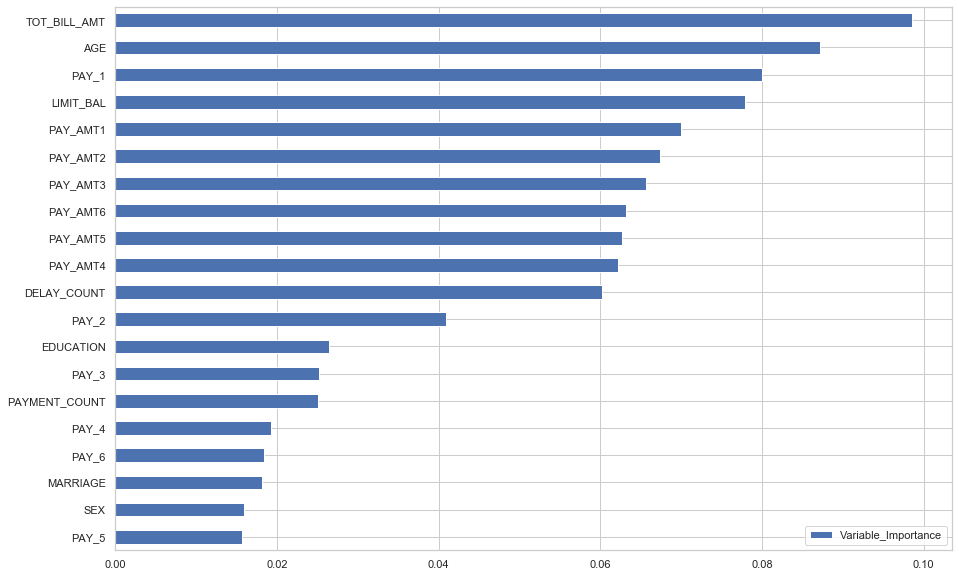

In [538]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X)

## Scale the Predictors on the train/val dataset
X_scaled = std.transform(X) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_scaled, y) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)

# Set seaborn contexts 
sns.set(style="whitegrid")

feature_importance.plot.barh(figsize=(15,10))

In [539]:
rf = RandomForestClassifier(n_estimators = 175,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [540]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

model = rf.fit(X_train_resampled, y_train_resampled)
yproba = model.predict_proba(X_test)[::,1]
    
# predict class values
yhat = model.predict(X_test)
model_precision, model_recall, model_thresholds = precision_recall_curve(y_test, yproba)
model_f1, model_auc = f1_score(y_test, yhat), auc(model_recall, model_precision)
    


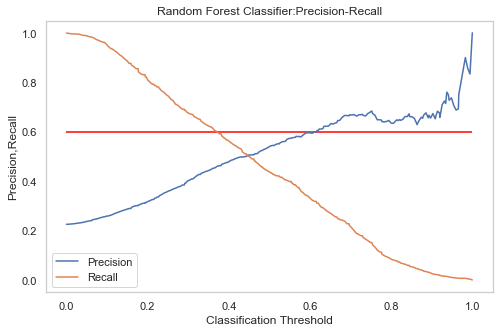

In [541]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(model_thresholds,model_precision[1:],label='Precision')
ax.plot(model_thresholds,model_recall[1:],label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision,Recall')
ax.set_title('Random Forest Classifier:Precision-Recall')
ax.hlines(y=0.6,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid();

In [542]:
from sklearn.metrics import precision_score,recall_score

#### Threshold Control to get optimum Recall and Precision

In [543]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba>=0.2).astype('int')
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
print('Recall :',100*recall_score(y_pred=y_pred_test,y_true=y_test))
print('Precision:',100*precision_score(y_pred=y_pred_test,y_true=y_test))
CM

Recall : 82.17455621301775
Precision: 31.33991537376587


array([[2214, 2434],
       [ 241, 1111]], dtype=int64)

Based on the business requirements, threshold will be set for an optimum value on recall and precision.

### Using Only 3 months data for analysis

In [308]:
credit_card2=pd.read_csv("C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Capstone\\Capstone Projects\\Credit Card\\default-of-credit-card-clients-dataset\\UCI_Credit_Card.csv")
credit_card2.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27394,27395,300000.0,1,2,1,40,0,0,0,0,0,0,25492.0,28048.0,30582.0,33059.0,35498.0,39902.0,3000.0,3000.0,3000.0,3000.0,5000.0,5000.0,0
20925,20926,200000.0,1,1,2,34,-2,-2,-2,-2,-2,-2,1740.0,10108.0,291.0,2515.0,1133.0,-363.0,10108.0,291.0,2515.0,1133.0,0.0,0.0,0
12070,12071,140000.0,2,1,1,41,0,0,0,0,0,0,142129.0,130705.0,99736.0,80445.0,81005.0,79387.0,15126.0,9064.0,4009.0,5014.0,5011.0,7006.0,1


### Grouping unknown values in education

In [309]:
credit_card2['EDUCATION'][(credit_card2['EDUCATION']==5) | (credit_card2['EDUCATION']==6) | (credit_card2['EDUCATION']==0)] = 4
credit_card2['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Grouping unknown values in marriage

In [310]:
credit_card2['MARRIAGE'][credit_card2['MARRIAGE'] == 0] = 3
credit_card2.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Renaming attributes

In [311]:
credit_card2 = credit_card2.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
credit_card2.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [312]:
credit_card2.drop(['ID','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_4','PAY_5','PAY_6','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1,inplace=True)

In [313]:
credit_card2.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,3913.0,3102.0,689.0,0.0,689.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,2682.0,1725.0,2682.0,0.0,1000.0,1000.0,1


In [314]:
pay_status_columns = ['PAY_1', 'PAY_2', 'PAY_3']
pay_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']
bill_amt_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']

In [315]:
credit_card2['DELAY_COUNT']=credit_card2[pay_status_columns][credit_card2[pay_status_columns]>0].count(axis=1)

In [316]:
credit_card2['TOT_BILL_AMT']=credit_card2[bill_amt_columns].sum(axis=1)

In [317]:
credit_card2['PAYMENT_COUNT']=credit_card2[pay_amt_columns][credit_card2[pay_amt_columns]>0].count(axis=1)

In [318]:
credit_card2.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,DEFAULT,DELAY_COUNT,TOT_BILL_AMT,PAYMENT_COUNT
0,20000.0,2,2,1,24,2,2,-1,3913.0,3102.0,689.0,0.0,689.0,0.0,1,2,7704.0,1
1,120000.0,2,2,2,26,-1,2,0,2682.0,1725.0,2682.0,0.0,1000.0,1000.0,1,1,7089.0,2


In [319]:
credit_card2.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3'],axis=1,inplace=True)

In [320]:
X=credit_card2.drop('DEFAULT',axis=1)
y=credit_card2['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=12)

In [321]:
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.449989
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29985
Method:                           MLE   Df Model:                           14
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                  0.1484
Time:                        13:20:09   Log-Likelihood:                -13500.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7994      0.134     -5.971      0.000      -1.062      -0.537
LIMIT_BAL     -2.091e-06   1.65e-07    -12.636      0.000   -2.42e-06   -1.77e-06
SEX              -0.1299      0.031     -4.134      0.000      -0.192      -0.068
EDUCATION        -0.0614      0.022     -2.756      0.006      -0.105      -0.018
MARRIAGE         -0.1586      0.033     -4.875      0.000      -0.222      -0.095
AGE               0.0051      0.002      2.801      0.005       0.002       0.009
PAY_1             0.2364      0.020     11.913      0.000       0.197       0.275
PAY_2            -0.1406      0.021     -6.633      0.000      -0.182      -0.099
PAY_3            -0.0178      0.019     -0.936      0.349      -0.055       0.019
PAY_AMT1      -8.697e-06   1.92e-06     -4.533      0.000   -1.25e-05   -4.94e-06
PAY_AMT2       -6.56e-06   1.66e-06     -3.942      0.000   -9.82e-06    -3.3e-06
PAY_AMT3      -2.142e-06    1.4e-06     -1.535      0.125   -4.88e-06    5.93e-07
DELAY_COUNT       0.7061      0.030     23.756      0.000       0.648       0.764
TOT_BILL_AMT   5.727e-07   9.87e-08      5.805      0.000    3.79e-07    7.66e-07
PAYMENT_COUNT    -0.1209      0.020     -6.087      0.000      -0.160      -0.082
=================================================================================
"""

#### SMOTE

In [322]:
# Smote train dataset using a 50-50 split
smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Transform resample X_train into DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled)

In [323]:
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [324]:
lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
y_train_pred=lr.predict(X_train_resampled)
y_train_prob=lr.predict_proba(X_train_resampled)[:,1]
print("Confusion Matrix - Train: ",'\n',confusion_matrix(y_train_resampled,y_train_pred))
print("Overall Accuracy - Train: ",accuracy_score(y_train_resampled,y_train_pred))
print('ROC score: ',roc_auc_score(y_train_resampled, y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n')
print("Confusion Matrix - Test: ",'\n',confusion_matrix(y_test,y_test_pred))
print("Overall Accuracy - Test: ",accuracy_score(y_test,y_test_pred))
print('ROC score: ',roc_auc_score(y_test, y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train:  
 [[ 9945  8771]
 [ 5676 13040]]
Overall Accuracy - Train:  0.614046804872836
ROC score:  0.6513018423297157
Classification Report- 
               precision    recall  f1-score   support

           0       0.64      0.53      0.58     18716
           1       0.60      0.70      0.64     18716

    accuracy                           0.61     37432
   macro avg       0.62      0.61      0.61     37432
weighted avg       0.62      0.61      0.61     37432



Confusion Matrix - Test:  
 [[2481 2167]
 [ 421  931]]
Overall Accuracy - Test:  0.5686666666666667
ROC score:  0.6448504287649328
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.53      0.66      4648
           1       0.30      0.69      0.42      1352

    accuracy                           0.57      6000
   macro avg       0.58      0.61      0.54      6000
weighted avg       0.73      0.57      0.60      6000



#### UnderSampling

In [326]:
credit_card2.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,DEFAULT,DELAY_COUNT,TOT_BILL_AMT,PAYMENT_COUNT
0,20000.0,2,2,1,24,2,2,-1,0.0,689.0,0.0,1,2,7704.0,1
1,120000.0,2,2,2,26,-1,2,0,0.0,1000.0,1000.0,1,1,7089.0,2


In [327]:
#### Undersampling

X_train.head(2)

Xytrain = pd.concat([X_train, y_train], axis = 1)
print('Before Undersampling: ', '\n', Xytrain['DEFAULT'].value_counts())

Xytrain0 = Xytrain[Xytrain['DEFAULT'] == 0]
Xytrain1 = Xytrain[Xytrain['DEFAULT'] == 1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)
print('\n')

Xytrain0_us = Xytrain0.sample(len1, random_state = 3)
Xytrain_us = pd.concat([Xytrain0_us, Xytrain1], axis = 0)

print('After Undersampling: ', '\n',  Xytrain_us['DEFAULT'].value_counts())

y_train_us = Xytrain_us['DEFAULT']
X_train_us = Xytrain_us.drop('DEFAULT', axis = 1)

Before Undersampling:  
 0    18716
1     5284
Name: DEFAULT, dtype: int64


After Undersampling:  
 1    5284
0    5284
Name: DEFAULT, dtype: int64


In [328]:
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [329]:
lr.fit(X_train_us,y_train_us)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
y_train_pred=lr.predict(X_train_us)
y_train_prob=lr.predict_proba(X_train_us)[:,1]
print("Confusion Matrix - Train: ",'\n',confusion_matrix(y_train_us,y_train_pred))
print("Overall Accuracy - Train: ",accuracy_score(y_train_us,y_train_pred))
print('ROC score: ',roc_auc_score(y_train_us, y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n')
print("Confusion Matrix - Test: ",'\n',confusion_matrix(y_test,y_test_pred))
print("Overall Accuracy - Test: ",accuracy_score(y_test,y_test_pred))
print('ROC score: ',roc_auc_score(y_test, y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train:  
 [[4389  895]
 [2291 2993]]
Overall Accuracy - Train:  0.6985238455715367
ROC score:  0.734746812539075
Classification Report- 
               precision    recall  f1-score   support

           0       0.66      0.83      0.73      5284
           1       0.77      0.57      0.65      5284

    accuracy                           0.70     10568
   macro avg       0.71      0.70      0.69     10568
weighted avg       0.71      0.70      0.69     10568



Confusion Matrix - Test:  
 [[3820  828]
 [ 575  777]]
Overall Accuracy - Test:  0.7661666666666667
ROC score:  0.7331695760217539
Classification Report- 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4648
           1       0.48      0.57      0.53      1352

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.77      6000



In [331]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [ LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_us, y_train_us)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show() 

result_table1 = pd.DataFrame(columns=['classifiers',
                                      'no_skill',
                                        'model_recall', 
                                        'model_precision'])

model_f1=[] 
model_auc=[]
model_precision=[]
model_recall=[]
no_skill=[]

classifiers = [LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()] 

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

from sklearn.metrics import precision_recall_curve,f1_score

for cls in classifiers:
    model = cls.fit(X_train_us, y_train_us)
    yproba = model.predict_proba(X_test)[:,1]
    
    # predict class values
    yhat = model.predict(X_test)
    model_precision, model_recall, _= precision_recall_curve(y_test, yproba)
    model_f1, model_auc = f1_score(y_test, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))
#marker='.', label=result_table1.loc[i]['classifiers']
for i in result_table1.index:
    #r1=np.vectorize(result_table1.loc[i]['model_recall'])
   # r2=np.vectorize(result_table1.loc[i]['model_precision'])
    r1=result_table1.loc[i]['model_recall']
    r2=result_table1.loc[i]['model_precision']
    pyplot.plot( [0, 1],[result_table1.loc[i]['no_skill'], result_table1.loc[i]['no_skill']], linestyle='--', label='No Skill')
    pyplot.plot(r1, r2,
                
                marker='.', label=i)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
pyplot.show()from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

SyntaxError: invalid syntax (<ipython-input-331-c94d58954478>, line 120)

### Model Pipelining

In [332]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Class Columns used to apply features transformation
class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

# List of numerical features
numeric1 = [
    'LIMIT_BAL',
    'AGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'TOT_BILL_AMT',
    
]

# List of categorical features
categorical1 = ['SEX', 'EDUCATION', 'MARRIAGE','DELAY_COUNT','PAYMENT_COUNT']

# Build feature engineering pipeline step
features1 = FeatureUnion([
        ('numeric', make_pipeline(Columns(names=numeric1),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=categorical1),OneHotEncoder(sparse=False)))
    ])


In [333]:
num_folds=10
seed=3

In [334]:
column_names1=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results1 = pd.DataFrame(columns = column_names1)

#### Pipelining without Sampling

In [335]:
results1 = []
names1 = []
tested_models1 = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models1:
    pipe1 = Pipeline([
        ("features", features1),
        ('model', tested_models1[model])
    ])
    kfold1 = KFold(n_splits=num_folds, random_state=seed)
    skf1 = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results1 = cross_validate(tested_models1[model],X_train, y_train, cv=skf1,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results1.append(cv_results1)
    names1.append(model)
    
    modeldf1 =  pd.DataFrame([[model,cv_results1['test_accuracy'].mean(),cv_results1['test_precision'].mean(),cv_results1['test_recall'].mean(),cv_results1['test_f1'].mean(),cv_results1['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results1 = model_results1.append(modeldf1, ignore_index = True)

In [336]:
model_results1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.630637
1,knn,0.751667,0.352336,0.151031,0.211163,0.588916
2,DT,0.727083,0.387371,0.409917,0.398154,0.613522
3,NB,0.433375,0.256744,0.829682,0.392067,0.665777
4,svm,0.779833,0.000000,0.000000,0.000000,0.511151
5,Ada,0.818417,0.673257,0.341601,0.452891,0.773436
6,RFC,0.813792,0.630850,0.372258,0.468082,0.761817
7,LGBM,0.819583,0.669958,0.356360,0.464975,0.777374


#### UnderSampled Pipeline

In [337]:
results1 = []
names1 = []
tested_models1 = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models1:
    pipe1 = Pipeline([
        ("features", features1),
        ('model', tested_models1[model])
    ])
    kfold1 = KFold(n_splits=num_folds, random_state=seed)
    skf1 = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results1 = cross_validate(tested_models1[model],X_train_us, y_train_us, cv=skf1,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results1.append(cv_results1)
    names1.append(model)
    
    modeldf1 =  pd.DataFrame([[model+' UnderSampling',cv_results1['test_accuracy'].mean(),cv_results1['test_precision'].mean(),cv_results1['test_recall'].mean(),cv_results1['test_f1'].mean(),cv_results1['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results1 = model_results1.append(modeldf1, ignore_index = True)

In [338]:
model_results1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.630637
1,knn,0.751667,0.352336,0.151031,0.211163,0.588916
2,DT,0.727083,0.387371,0.409917,0.398154,0.613522
3,NB,0.433375,0.256744,0.829682,0.392067,0.665777
4,svm,0.779833,0.000000,0.000000,0.000000,0.511151
5,Ada,0.818417,0.673257,0.341601,0.452891,0.773436
6,RFC,0.813792,0.630850,0.372258,0.468082,0.761817
7,LGBM,0.819583,0.669958,0.356360,0.464975,0.777374
8,lr UnderSampling,0.584882,0.584379,0.595248,0.574902,0.631171
9,knn UnderSampling,0.573712,0.575388,0.563028,0.569042,0.598551


#### SMOTE Pipeline

In [339]:
results1 = []
names1 = []
tested_models1 = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm': SVC(),
    'Ada' : AdaBoostClassifier(),
    'RFC' : RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
    'LGBM' : lgb.LGBMClassifier()
}



for model in tested_models1:
    pipe1 = Pipeline([
        ("features", features1),
        ('model', tested_models1[model])
    ])
    kfold1 = KFold(n_splits=num_folds, random_state=seed)
    skf1 = StratifiedKFold(n_splits=num_folds, random_state=seed)

    cv_results1 = cross_validate(tested_models1[model],X_train_resampled, y_train_resampled, cv=skf1,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results1.append(cv_results1)
    names1.append(model)
    
    modeldf1 =  pd.DataFrame([[model+' smote',cv_results1['test_accuracy'].mean(),cv_results1['test_precision'].mean(),cv_results1['test_recall'].mean(),cv_results1['test_f1'].mean(),cv_results1['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results1 = model_results1.append(modeldf1, ignore_index = True)

In [340]:
model_results1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.779833,0.000000,0.000000,0.000000,0.630637
1,knn,0.751667,0.352336,0.151031,0.211163,0.588916
2,DT,0.727083,0.387371,0.409917,0.398154,0.613522
3,NB,0.433375,0.256744,0.829682,0.392067,0.665777
4,svm,0.779833,0.000000,0.000000,0.000000,0.511151
5,Ada,0.818417,0.673257,0.341601,0.452891,0.773436
6,RFC,0.813792,0.630850,0.372258,0.468082,0.761817
7,LGBM,0.819583,0.669958,0.356360,0.464975,0.777374
8,lr UnderSampling,0.584882,0.584379,0.595248,0.574902,0.631171
9,knn UnderSampling,0.573712,0.575388,0.563028,0.569042,0.598551


In [341]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [ LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_us, y_train_us)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

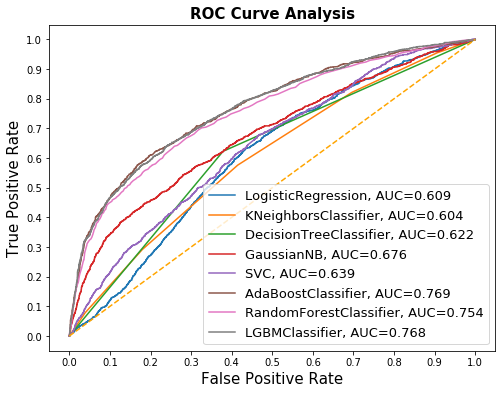

In [342]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show() 

In [343]:
result_table1 = pd.DataFrame(columns=['classifiers',
                                      'no_skill',
                                        'model_recall', 
                                        'model_precision'])

In [344]:
model_f1=[] 
model_auc=[]
model_precision=[]
model_recall=[]
no_skill=[]

In [345]:
classifiers = [LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
     AdaBoostClassifier(),
    RandomForestClassifier(criterion= 'entropy',n_estimators = 175),
     lgb.LGBMClassifier()] 

In [346]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [347]:
from sklearn.metrics import precision_recall_curve,f1_score

In [348]:
for cls in classifiers:
    model = cls.fit(X_train_us, y_train_us)
    yproba = model.predict_proba(X_test)[:,1]
    
    # predict class values
    yhat = model.predict(X_test)
    model_precision, model_recall, _= precision_recall_curve(y_test, yproba)
    model_f1, model_auc = f1_score(y_test, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False): f1=0.304 auc=0.275
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): f1=0.384 auc=0.323
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): f1=0.419 auc=0.508


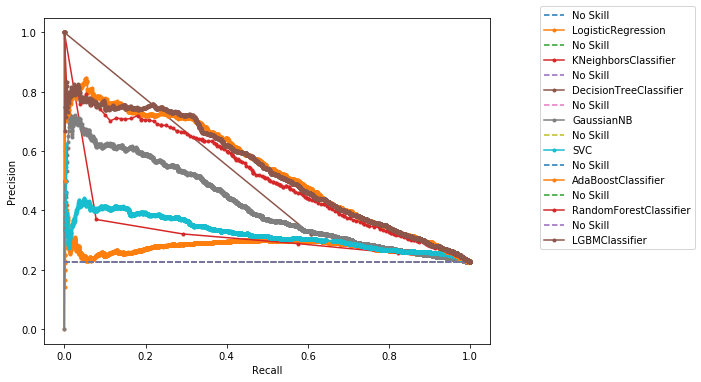

In [349]:
fig = plt.figure(figsize=(8,6))
#marker='.', label=result_table1.loc[i]['classifiers']
for i in result_table1.index:
    #r1=np.vectorize(result_table1.loc[i]['model_recall'])
   # r2=np.vectorize(result_table1.loc[i]['model_precision'])
    r1=result_table1.loc[i]['model_recall']
    r2=result_table1.loc[i]['model_precision']
    pyplot.plot( [0, 1],[result_table1.loc[i]['no_skill'], result_table1.loc[i]['no_skill']], linestyle='--', label='No Skill')
    pyplot.plot(r1, r2,
                
                marker='.', label=i)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
pyplot.show()

### Evaluating each and every model separately

### Decision Tree Classifier

In [337]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_train_prob=dt.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[18716     0]
 [   11  5273]]
Accuracy Score - Train  
 0.9995416666666667
AUC - Train 
 0.9989591218773657
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18716
           1       1.00      1.00      1.00      5284

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion Matrix - Test  
 [[3687  961]
 [ 815  537]]
Accuracy Score - Test 
 0.704
AUC - Test 
 0.5952168776543197
Classification Report- 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      4648
           1       0.36      0.40      0.38      1352

    accuracy                           0.70      6000
   macro avg       0.59      0.60      0.59      6000
weighted avg       0.72      0.70      0.71      6000



In [338]:
dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)
y_train_pred=dt.predict(X_train_resampled)
y_train_prob=dt.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[18709     7]
 [   16 18700]]
Accuracy Score - Train  
 0.9993855524684762
AUC - Train 
 0.9993855524684762
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18716
           1       1.00      1.00      1.00     18716

    accuracy                           1.00     37432
   macro avg       1.00      1.00      1.00     37432
weighted avg       1.00      1.00      1.00     37432

Confusion Matrix - Test  
 [[3487 1161]
 [ 720  632]]
Accuracy Score - Test 
 0.6865
AUC - Test 
 0.6088353838006294
Classification Report- 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      4648
           1       0.35      0.47      0.40      1352

    accuracy                           0.69      6000
   macro avg       0.59      0.61      0.59      6000
weighted avg       0.72      0.69      0.70      6000



In [339]:
dt.fit(X_train_us,y_train_us)
y_train_pred=dt.predict(X_train_us)
y_train_prob=dt.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[5284    0]
 [   2 5282]]
Accuracy Score - Train  
 0.9998107494322483
AUC - Train 
 0.9998107494322483
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5284
           1       1.00      1.00      1.00      5284

    accuracy                           1.00     10568
   macro avg       1.00      1.00      1.00     10568
weighted avg       1.00      1.00      1.00     10568

Confusion Matrix - Test  
 [[2855 1793]
 [ 488  864]]
Accuracy Score - Test 
 0.6198333333333333
AUC - Test 
 0.6266479697318438
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.61      0.71      4648
           1       0.33      0.64      0.43      1352

    accuracy                           0.62      6000
   macro avg       0.59      0.63      0.57      6000
weighted avg       0.73      0.62      0.65      6000



As expected decision tree is overfitting some hyper parameter tunning needs to be performed.

### Random Forest Classifier

In [330]:
rfc=RandomForestClassifier()

In [336]:
rfc.fit(X_train,y_train)
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[18710     6]
 [    6  5278]]
Accuracy Score - Train  
 0.9995
AUC - Train 
 0.9992719576363474
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18716
           1       1.00      1.00      1.00      5284

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion Matrix - Test  
 [[4382  266]
 [ 852  500]]
Accuracy Score - Test 
 0.8136666666666666
AUC - Test 
 0.656296784772225
Classification Report- 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4648
           1       0.65      0.37      0.47      1352

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.81      0.79      6000



In [334]:
rfc.fit(X_train_resampled,y_train_resampled)
y_train_pred=rfc.predict(X_train_resampled)
y_train_prob=rfc.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[18696    20]
 [    4 18712]]
Accuracy Score - Train  
 0.9993588373584099
AUC - Train 
 0.9993588373584099
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18716
           1       1.00      1.00      1.00     18716

    accuracy                           1.00     37432
   macro avg       1.00      1.00      1.00     37432
weighted avg       1.00      1.00      1.00     37432

Confusion Matrix - Test  
 [[3927  721]
 [ 718  634]]
Accuracy Score - Test 
 0.7601666666666667
AUC - Test 
 0.6569072146574463
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4648
           1       0.47      0.47      0.47      1352

    accuracy                           0.76      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.76      0.76      0.76      6000



In [335]:
rfc.fit(X_train_us,y_train_us)
y_train_pred=rfc.predict(X_train_us)
y_train_prob=rfc.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[5281    3]
 [   0 5284]]
Accuracy Score - Train  
 0.9997161241483724
AUC - Train 
 0.9997161241483725
Classification Report- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5284
           1       1.00      1.00      1.00      5284

    accuracy                           1.00     10568
   macro avg       1.00      1.00      1.00     10568
weighted avg       1.00      1.00      1.00     10568

Confusion Matrix - Test  
 [[3520 1128]
 [ 502  850]]
Accuracy Score - Test 
 0.7283333333333334
AUC - Test 
 0.6930065995172576
Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      4648
           1       0.43      0.63      0.51      1352

    accuracy                           0.73      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.77      0.73      0.74      6000



#### Hyper Parameter Tuning

In [365]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [366]:
rfc = RandomForestClassifier(random_state = 3)

params = {
          'n_estimators': sp_randint(50,200),
          'max_features': sp_randint(1,24),
          'max_depth': sp_randint(2,10),
          'min_samples_split': sp_randint(2,20),
          'min_samples_leaf': sp_randint(1,20),
          'criterion': ['gini','entropy']
         }

rsearch_rfc = RandomizedSearchCV(rfc, param_distributions = params, n_iter = 50, cv = 3, scoring = 'roc_auc', \
                   random_state = 3, n_jobs=-1, return_train_score = True)

rsearch_rfc.fit(X, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [374]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 175}

In [367]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_, random_state = 3)
rfc.fit(X_train_us,y_train_us)
y_train_pred=rfc.predict(X_train_us)
y_train_prob=rfc.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[4335  949]
 [1787 3497]]
Accuracy Score - Train  
 0.74110522331567
AUC - Train 
 0.74110522331567
Classification Report- 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      5284
           1       0.79      0.66      0.72      5284

    accuracy                           0.74     10568
   macro avg       0.75      0.74      0.74     10568
weighted avg       0.75      0.74      0.74     10568

Confusion Matrix - Test  
 [[3639 1009]
 [ 488  864]]
Accuracy Score - Test 
 0.7505
AUC - Test 
 0.7109853191294342
Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4648
           1       0.46      0.64      0.54      1352

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.76      6000



### KNN

In [288]:
from sklearn.neighbors import KNeighborsClassifier

In [284]:
knn=KNeighborsClassifier()

In [340]:
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_train_prob=knn.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=knn.predict(X_test)
y_test_prob=knn.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[17938   778]
 [ 3703  1581]]
Accuracy Score - Train  
 0.8132916666666666
AUC - Train 
 0.6288182181761762
Classification Report- 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     18716
           1       0.67      0.30      0.41      5284

    accuracy                           0.81     24000
   macro avg       0.75      0.63      0.65     24000
weighted avg       0.79      0.81      0.78     24000

Confusion Matrix - Test  
 [[4294  354]
 [1156  196]]
Accuracy Score - Test 
 0.7483333333333333
AUC - Test 
 0.5344043120919858
Classification Report- 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      4648
           1       0.36      0.14      0.21      1352

    accuracy                           0.75      6000
   macro avg       0.57      0.53      0.53      6000
weighted avg       0.69      0.75      0.71      6000



In [341]:
knn.fit(X_train_resampled,y_train_resampled)
y_train_pred=knn.predict(X_train_resampled)
y_train_prob=knn.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=knn.predict(X_test)
y_test_prob=knn.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[14029  4687]
 [ 1577 17139]]
Accuracy Score - Train  
 0.8326565505449882
AUC - Train 
 0.8326565505449882
Classification Report- 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82     18716
           1       0.79      0.92      0.85     18716

    accuracy                           0.83     37432
   macro avg       0.84      0.83      0.83     37432
weighted avg       0.84      0.83      0.83     37432

Confusion Matrix - Test  
 [[3014 1634]
 [ 684  668]]
Accuracy Score - Test 
 0.6136666666666667
AUC - Test 
 0.5712668934402021
Classification Report- 
               precision    recall  f1-score   support

           0       0.82      0.65      0.72      4648
           1       0.29      0.49      0.37      1352

    accuracy                           0.61      6000
   macro avg       0.55      0.57      0.54      6000
weighted avg       0.70      0.61      0.64      6000



In [342]:
knn.fit(X_train_us,y_train_us)
y_train_pred=knn.predict(X_train_us)
y_train_prob=knn.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=knn.predict(X_test)
y_test_prob=knn.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[3924 1360]
 [1577 3707]]
Accuracy Score - Train  
 0.7220855412566237
AUC - Train 
 0.7220855412566237
Classification Report- 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      5284
           1       0.73      0.70      0.72      5284

    accuracy                           0.72     10568
   macro avg       0.72      0.72      0.72     10568
weighted avg       0.72      0.72      0.72     10568

Confusion Matrix - Test  
 [[2772 1876]
 [ 589  763]]
Accuracy Score - Test 
 0.5891666666666666
AUC - Test 
 0.5803673272973551
Classification Report- 
               precision    recall  f1-score   support

           0       0.82      0.60      0.69      4648
           1       0.29      0.56      0.38      1352

    accuracy                           0.59      6000
   macro avg       0.56      0.58      0.54      6000
weighted avg       0.70      0.59      0.62      6000



### SVM

In [343]:
svm=SVC()

In [344]:
svm.fit(X_train,y_train)
y_train_pred=svm.predict(X_train)
y_train_prob=svm.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[18716     0]
 [ 5284     0]]
Accuracy Score - Train  
 0.7798333333333334
AUC - Train 
 0.5
Classification Report- 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     18716
           1       0.00      0.00      0.00      5284

    accuracy                           0.78     24000
   macro avg       0.39      0.50      0.44     24000
weighted avg       0.61      0.78      0.68     24000

Confusion Matrix - Test  
 [[4648    0]
 [1352    0]]
Accuracy Score - Test 
 0.7746666666666666
AUC - Test 
 0.5
Classification Report- 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4648
           1       0.00      0.00      0.00      1352

    accuracy                           0.77      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.77      0.68      6000



In [345]:
svm.fit(X_train_resampled,y_train_resampled)
y_train_pred=svm.predict(X_train_resampled)
y_train_prob=svm.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[10003  8713]
 [ 6032 12684]]
Accuracy Score - Train  
 0.6060857020730925
AUC - Train 
 0.6060857020730925
Classification Report- 
               precision    recall  f1-score   support

           0       0.62      0.53      0.58     18716
           1       0.59      0.68      0.63     18716

    accuracy                           0.61     37432
   macro avg       0.61      0.61      0.60     37432
weighted avg       0.61      0.61      0.60     37432

Confusion Matrix - Test  
 [[2527 2121]
 [ 447  905]]
Accuracy Score - Test 
 0.572
AUC - Test 
 0.6065266985100164
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.54      0.66      4648
           1       0.30      0.67      0.41      1352

    accuracy                           0.57      6000
   macro avg       0.57      0.61      0.54      6000
weighted avg       0.73      0.57      0.61      6000



In [346]:
svm.fit(X_train_us,y_train_us)
y_train_pred=svm.predict(X_train_us)
y_train_prob=svm.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[2741 2543]
 [1717 3567]]
Accuracy Score - Train  
 0.5968962906888721
AUC - Train 
 0.596896290688872
Classification Report- 
               precision    recall  f1-score   support

           0       0.61      0.52      0.56      5284
           1       0.58      0.68      0.63      5284

    accuracy                           0.60     10568
   macro avg       0.60      0.60      0.59     10568
weighted avg       0.60      0.60      0.59     10568

Confusion Matrix - Test  
 [[2465 2183]
 [ 441  911]]
Accuracy Score - Test 
 0.5626666666666666
AUC - Test 
 0.6020760981372658
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.53      0.65      4648
           1       0.29      0.67      0.41      1352

    accuracy                           0.56      6000
   macro avg       0.57      0.60      0.53      6000
weighted avg       0.72      0.56      0.60      6000



### Navie Bayes

In [347]:
nb=GaussianNB()

In [348]:
nb.fit(X_train,y_train)
y_train_pred=nb.predict(X_train)
y_train_prob=nb.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=nb.predict(X_test)
y_test_prob=nb.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[ 5716 13000]
 [  858  4426]]
Accuracy Score - Train  
 0.4225833333333333
AUC - Train 
 0.5715150755732241
Classification Report- 
               precision    recall  f1-score   support

           0       0.87      0.31      0.45     18716
           1       0.25      0.84      0.39      5284

    accuracy                           0.42     24000
   macro avg       0.56      0.57      0.42     24000
weighted avg       0.73      0.42      0.44     24000

Confusion Matrix - Test  
 [[1436 3212]
 [ 217 1135]]
Accuracy Score - Test 
 0.4285
AUC - Test 
 0.5742235637393192
Classification Report- 
               precision    recall  f1-score   support

           0       0.87      0.31      0.46      4648
           1       0.26      0.84      0.40      1352

    accuracy                           0.43      6000
   macro avg       0.56      0.57      0.43      6000
weighted avg       0.73      0.43      0.44      6000



In [349]:
nb.fit(X_train_resampled,y_train_resampled)
y_train_pred=nb.predict(X_train_resampled)
y_train_prob=nb.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=nb.predict(X_test)
y_test_prob=nb.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[ 2336 16380]
 [  686 18030]]
Accuracy Score - Train  
 0.5440799316093182
AUC - Train 
 0.5440799316093182
Classification Report- 
               precision    recall  f1-score   support

           0       0.77      0.12      0.21     18716
           1       0.52      0.96      0.68     18716

    accuracy                           0.54     37432
   macro avg       0.65      0.54      0.45     37432
weighted avg       0.65      0.54      0.45     37432

Confusion Matrix - Test  
 [[ 580 4068]
 [  69 1283]]
Accuracy Score - Test 
 0.3105
AUC - Test 
 0.5368746753709683
Classification Report- 
               precision    recall  f1-score   support

           0       0.89      0.12      0.22      4648
           1       0.24      0.95      0.38      1352

    accuracy                           0.31      6000
   macro avg       0.57      0.54      0.30      6000
weighted avg       0.75      0.31      0.26      6000



In [350]:
nb.fit(X_train_us,y_train_us)
y_train_pred=nb.predict(X_train_us)
y_train_prob=nb.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=nb.predict(X_test)
y_test_prob=nb.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[ 671 4613]
 [ 237 5047]]
Accuracy Score - Train  
 0.5410673732021196
AUC - Train 
 0.5410673732021196
Classification Report- 
               precision    recall  f1-score   support

           0       0.74      0.13      0.22      5284
           1       0.52      0.96      0.68      5284

    accuracy                           0.54     10568
   macro avg       0.63      0.54      0.45     10568
weighted avg       0.63      0.54      0.45     10568

Confusion Matrix - Test  
 [[ 611 4037]
 [  75 1277]]
Accuracy Score - Test 
 0.31466666666666665
AUC - Test 
 0.5379905081017222
Classification Report- 
               precision    recall  f1-score   support

           0       0.89      0.13      0.23      4648
           1       0.24      0.94      0.38      1352

    accuracy                           0.31      6000
   macro avg       0.57      0.54      0.31      6000
weighted avg       0.74      0.31      0.26      6000



### AdaBoost

In [351]:
ada=AdaBoostClassifier()

In [352]:
ada.fit(X_train,y_train)
y_train_pred=ada.predict(X_train)
y_train_prob=ada.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=ada.predict(X_test)
y_test_prob=ada.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[17836   880]
 [ 3431  1853]]
Accuracy Score - Train  
 0.820375
AUC - Train 
 0.65183135416365
Classification Report- 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     18716
           1       0.68      0.35      0.46      5284

    accuracy                           0.82     24000
   macro avg       0.76      0.65      0.68     24000
weighted avg       0.80      0.82      0.80     24000

Confusion Matrix - Test  
 [[4431  217]
 [ 888  464]]
Accuracy Score - Test 
 0.8158333333333333
AUC - Test 
 0.6482542596421187
Classification Report- 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4648
           1       0.68      0.34      0.46      1352

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [353]:
ada.fit(X_train_resampled,y_train_resampled)
y_train_pred=ada.predict(X_train_resampled)
y_train_prob=ada.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=ada.predict(X_test)
y_test_prob=ada.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[14694  4022]
 [ 4398 14318]]
Accuracy Score - Train  
 0.7750587732421458
AUC - Train 
 0.7750587732421458
Classification Report- 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     18716
           1       0.78      0.77      0.77     18716

    accuracy                           0.78     37432
   macro avg       0.78      0.78      0.78     37432
weighted avg       0.78      0.78      0.78     37432

Confusion Matrix - Test  
 [[3562 1086]
 [ 564  788]]
Accuracy Score - Test 
 0.725
AUC - Test 
 0.674595677723574
Classification Report- 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      4648
           1       0.42      0.58      0.49      1352

    accuracy                           0.73      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.76      0.72      0.74      6000



In [355]:
ada.fit(X_train_us,y_train_us)
y_train_pred=ada.predict(X_train_us)
y_train_prob=ada.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=ada.predict(X_test)
y_test_prob=ada.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[4118 1166]
 [1787 3497]]
Accuracy Score - Train  
 0.7205715367146102
AUC - Train 
 0.7205715367146102
Classification Report- 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      5284
           1       0.75      0.66      0.70      5284

    accuracy                           0.72     10568
   macro avg       0.72      0.72      0.72     10568
weighted avg       0.72      0.72      0.72     10568

Confusion Matrix - Test  
 [[3545 1103]
 [ 469  883]]
Accuracy Score - Test 
 0.738
AUC - Test 
 0.7079000702726375
Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      4648
           1       0.44      0.65      0.53      1352

    accuracy                           0.74      6000
   macro avg       0.66      0.71      0.67      6000
weighted avg       0.78      0.74      0.75      6000



### LightGBM

In [356]:
import lightgbm as lgb

In [357]:
lgbm=lgb.LGBMClassifier()

In [358]:
lgbm.fit(X_train,y_train)
y_train_pred=lgbm.predict(X_train)
y_train_prob=lgbm.predict(X_train)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train,y_train_prob))
print('Classification Report- \n',classification_report(y_train, y_train_pred))
y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[17922   794]
 [ 3087  2197]]
Accuracy Score - Train  
 0.8382916666666667
AUC - Train 
 0.6866799512826408
Classification Report- 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     18716
           1       0.73      0.42      0.53      5284

    accuracy                           0.84     24000
   macro avg       0.79      0.69      0.72     24000
weighted avg       0.83      0.84      0.82     24000

Confusion Matrix - Test  
 [[4408  240]
 [ 853  499]]
Accuracy Score - Test 
 0.8178333333333333
AUC - Test 
 0.6587238641803053
Classification Report- 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4648
           1       0.68      0.37      0.48      1352

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [359]:
lgbm.fit(X_train_resampled,y_train_resampled)
y_train_pred=lgbm.predict(X_train_resampled)
y_train_prob=lgbm.predict(X_train_resampled)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_resampled,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_resampled,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_resampled,y_train_prob))
print('Classification Report- \n',classification_report(y_train_resampled, y_train_pred))
y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[16068  2648]
 [ 3561 15155]]
Accuracy Score - Train  
 0.8341258815986322
AUC - Train 
 0.8341258815986322
Classification Report- 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     18716
           1       0.85      0.81      0.83     18716

    accuracy                           0.83     37432
   macro avg       0.83      0.83      0.83     37432
weighted avg       0.83      0.83      0.83     37432

Confusion Matrix - Test  
 [[3882  766]
 [ 645  707]]
Accuracy Score - Test 
 0.7648333333333334
AUC - Test 
 0.6790634643391826
Classification Report- 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4648
           1       0.48      0.52      0.50      1352

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.77      0.76      0.77      6000



In [360]:
lgbm.fit(X_train_us,y_train_us)
y_train_pred=lgbm.predict(X_train_us)
y_train_prob=lgbm.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[4464  820]
 [1378 3906]]
Accuracy Score - Train  
 0.7920136260408781
AUC - Train 
 0.7920136260408781
Classification Report- 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      5284
           1       0.83      0.74      0.78      5284

    accuracy                           0.79     10568
   macro avg       0.80      0.79      0.79     10568
weighted avg       0.80      0.79      0.79     10568

Confusion Matrix - Test  
 [[3519 1129]
 [ 484  868]]
Accuracy Score - Test 
 0.7311666666666666
AUC - Test 
 0.6995558311012434
Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      4648
           1       0.43      0.64      0.52      1352

    accuracy                           0.73      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.73      0.75      6000



### Hyper Parameter Tunning

In [377]:
lgbm = lgb.LGBMClassifier(random_state = 3)

params = {
          'n_estimators': sp_randint(50,200),
          'max_features': sp_randint(1,24),
          'max_depth': sp_randint(2,10),
          'min_samples_split': sp_randint(2,20),
          'min_samples_leaf': sp_randint(1,20),
          'criterion': ['gini','entropy']
         }

rsearch_lgbm = RandomizedSearchCV(lgbm, param_distributions = params, n_iter = 50, cv = 3, scoring = 'roc_auc', \
                   random_state = 3, n_jobs=-1, return_train_score = True)

rsearch_lgbm.fit(X, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=3, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000223

In [ ]:
**rsearch_lgbm.best_params_

In [378]:
lgbm = lgb.LGBMClassifier(**rsearch_lgbm.best_params_, random_state = 3)
lgbm.fit(X_train_us,y_train_us)
y_train_pred=lgbm.predict(X_train_us)
y_train_prob=lgbm.predict(X_train_us)
print('Confusion Matrix - Train ','\n',confusion_matrix(y_train_us,y_train_pred))
print('Accuracy Score - Train ','\n',accuracy_score(y_train_us,y_train_pred))
print('AUC - Train','\n',roc_auc_score(y_train_us,y_train_prob))
print('Classification Report- \n',classification_report(y_train_us, y_train_pred))
y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict(X_test)
print('Confusion Matrix - Test ','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test','\n',accuracy_score(y_test,y_test_pred))
print('AUC - Test','\n',roc_auc_score(y_test,y_test_prob))
print('Classification Report- \n',classification_report(y_test, y_test_pred))

Confusion Matrix - Train  
 [[4202 1082]
 [1784 3500]]
Accuracy Score - Train  
 0.7288039364118092
AUC - Train 
 0.7288039364118093
Classification Report- 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      5284
           1       0.76      0.66      0.71      5284

    accuracy                           0.73     10568
   macro avg       0.73      0.73      0.73     10568
weighted avg       0.73      0.73      0.73     10568

Confusion Matrix - Test  
 [[3598 1050]
 [ 474  878]]
Accuracy Score - Test 
 0.746
AUC - Test 
 0.7117523347829187
Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.77      0.83      4648
           1       0.46      0.65      0.54      1352

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.76      6000

